<h1><center>Water Quality</center></h1>

<h2>Packages</h2>

In [1]:
# Load packages such as ggplot2, dplyr, tidyr, and readr to be able to use specialised functions for creating
# visualisations, reading, writing, and manipulating data.
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Load the tidygeocoder package to be able to use a function to convert the given latitude and longitude
# to address.
library(tidygeocoder)

In [3]:
# Load skimr package to be able to use a function to understand the structure of the dataframe we will analyse
library(skimr)

In [4]:
# Load the knitr package to be able to use a function for presenting information in a tidy format.
library(knitr)

In [5]:
# Load the visdat package to be able to use a function for visualisation of the data. 
library(visdat)

In [6]:
# Load the lubridate package to be able to use function(s) for manipulating datetime data type.
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
# Load the highcharter package to be able to use interactive charting/graphing functions.
library(highcharter)

ERROR: Error in library(highcharter): there is no package called ‘highcharter’


In [9]:
library(jsonlite)
library(XML)
library(xml2)
library(glue)
library(httr)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [25]:
library(repr)

<h2>Accessing and Importing Datasets</h2>

In [10]:
# A function to get data from the Ministry for the Environment database API

get_data_from_mfe <- function(api_key, data_id){
    
    query <- glue('https://data.mfe.govt.nz/services;key={api_key}/wfs?service=WFS&version=2.0.0&request=GetFeature&typeNames={data_id}') # creates a query url using inputs of api key and data-id number available on MfE website
    
    api_response <- GET(query) #gets the API response from the query
    
    data_xml <- read_xml(api_response) #reads the xml data from the api response
    
    data_parsed <- xmlParse(data_xml) #parses the data into an xml format that is readable in R
    
    data_df <- glue('//data.mfe.govt.nz:{data_id}') %>%  # creating a node name to look for
    getNodeSet(data_parsed, .)  %>%  # looking at nodes with the name
    xmlToDataFrame(nodes = .) #turns the data within the given node into a data frame
    
    return(data_df) #returns the data frame
}

In [11]:
# Get the river quality E. coli dataset from MfE using their API service.
# Then display the first six rows.
river_ecoli <- get_data_from_mfe("e046a540d83e49248cbda9cce3f23c2e", "table-109662")
river_ecoli %>% 
    head()

,field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,sen_lci,sen_uci,analysis_note,percent_annual_change,trend_direction,seasonal,freq,period,end_year,trend_confidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,ECOLI,E. coli,cfu/100ml,WWL,5122005,-38.4616,177.8767,GDC-00027,54,⋯,-70.66574688,4.753992744,ok,-5.500677702,Improving,FALSE,BiMonth,NA,2000,Very likely improving
2,2,ECOLI,E. coli,cfu/100ml,CWH,4084132,-38.0824,176.2122,EBOP-00010,38,⋯,6.241040718,38.83610442,ok,9.98312095,Worsening,FALSE,Qtr,NA,2000,Very likely worsening
3,3,ECOLI,E. coli,cfu/100ml,WWL,4085815,-38.0795,177.1362,EBOP-00011,38,⋯,-23.56314936,90.18457384,ok,2.746276512,Worsening,TRUE,Qtr,NA,2000,Likely worsening
4,4,ECOLI,E. coli,cfu/100ml,CWLk,4081484,-38.044,176.3308,EBOP-00012,38,⋯,0,0.809965979,ok,6.646951774,Worsening,TRUE,Qtr,NA,2000,Very likely worsening
5,5,ECOLI,E. coli,cfu/100ml,CWH,4083343,-38.0465,176.988,EBOP-00042,38,⋯,0.587990625,10.7212543,ok,10.00919766,Worsening,TRUE,Qtr,NA,2000,Very likely worsening
6,6,ECOLI,E. coli,cfu/100ml,WXL,5063036,-37.6746,178.3481,GDC-00002,36,⋯,-7.598926487,6.825007124,WARNING: Sen slope based on tied non-censored values,0,Indeterminate,FALSE,Qtr,NA,2000,Indeterminate


In [12]:
# Get the river quality nitrogen dataset from MfE using their API service.
# Then display the first six rows.
river_nitrogen <- get_data_from_mfe("e046a540d83e49248cbda9cce3f23c2e", "table-109659")
river_nitrogen %>% 
    head()

,field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,sen_lci,sen_uci,analysis_note,percent_annual_change,trend_direction,seasonal,freq,period,end_year,trend_confidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038450,-36.8889,174.5221,ARC-00001,116,⋯,-0.000364871,0,WARNING: Sen slope influenced by censored values,0,Improving,FALSE,Month,NA,2000,Very likely improving
2,2,NH4N,Ammoniacal nitrogen,g/m3,WWL,2031444,-36.345,174.7118,ARC-00008,115,⋯,0,0.00079865,WARNING: Sen slope influenced by censored values,0,Worsening,FALSE,Month,NA,2000,Likely worsening
3,3,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038644,-36.8949,174.5947,ARC-00013,118,⋯,0,0.001269986,ok,2.325248281,Worsening,FALSE,Month,NA,2000,Very likely worsening
4,4,NH4N,Ammoniacal nitrogen,g/m3,WDL,2040105,-36.9623,174.88,ARC-00015,108,⋯,-0.002164356,0.00166666,WARNING: Sen slope based on tied non-censored values,0,Indeterminate,FALSE,Month,NA,2000,Indeterminate
5,5,NH4N,Ammoniacal nitrogen,g/m3,WDL,2035880,-36.732,174.6947,ARC-00017,118,⋯,-0.009313005,-0.002790694,ok,-9.604112969,Improving,FALSE,Month,NA,2000,Very likely improving
6,6,NH4N,Ammoniacal nitrogen,g/m3,WWL,2033563,-36.551,174.6605,ARC-00026,117,⋯,-0.000242512,0.00157275,ok,1.727222315,Worsening,FALSE,Month,NA,2000,Likely worsening


In [13]:
# Read the groundwq.csv uploaded in GitHub and store it as groundwq for analysis.
groundwq <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/groundwq.csv" %>% 
  read_csv()
groundwq %>% 
    head()

Rows: 148645 Columns: 12
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Region, Agency, LAWASiteID, LAWAWellName, Indicator, Units, RawVal...
dbl  (3): Latitude, Longitude, CensoredValue
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Region,Agency,LAWASiteID,LAWAWellName,Latitude,Longitude,Indicator,Units,Date,RawValue,CenType,CensoredValue
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-05-01 08:48:00,28,not,28
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-07-20 11:07:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-10-09 11:56:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2013-01-09 10:55:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2013-04-16 12:02:00,29,not,29
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2014-04-24 11:35:00,27,not,27


In [14]:
# Read the new_river_ecoli uploaded in GitHub and store it as river_ecoli for analysis.
river_ecoli <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/new_river_ecoli.csv" %>% 
  read_csv()
river_ecoli %>% 
    head()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 7550 Columns: 69
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (40): measure_ab, measure, units, sof, s_id, analysis_note, trend_direct...
dbl (26): field_1, nzsegment, lat, long, n_obs, s, var_s, d, tau, z, p, c, c...
lgl  (3): seasonal, boundingbox, historic

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,amenity,railway,neighbourhood,leisure,city_district,craft,historic,quarter,farm,shop
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,ECOLI,E. coli,cfu/100ml,WWL,5122005,-38.4616,177.8767,GDC-00027,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,ECOLI,E. coli,cfu/100ml,CWH,4084132,-38.0824,176.2122,EBOP-00010,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ECOLI,E. coli,cfu/100ml,WWL,4085815,-38.0795,177.1362,EBOP-00011,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,ECOLI,E. coli,cfu/100ml,CWLk,4081484,-38.0440,176.3308,EBOP-00012,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ECOLI,E. coli,cfu/100ml,CWH,4083343,-38.0465,176.9880,EBOP-00042,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,ECOLI,E. coli,cfu/100ml,WXL,5063036,-37.6746,178.3481,GDC-00002,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [15]:
# Read the new_river_nitrogen.csv and store it as river_nitrogen for analysis.
river_nitrogen <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/new_river_nitrogen.csv" %>% 
  read_csv()
river_nitrogen %>% 
    head()

Rows: 25930 Columns: 69
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (41): measure_ab, measure, units, sof, s_id, analysis_note, trend_direct...
dbl (26): field_1, nzsegment, lat, long, n_obs, s, var_s, d, tau, z, p, c, c...
lgl  (2): seasonal, boundingbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,neighbourhood,shop,building,farm,highway,railway,city_district,craft,quarter,historic
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038450,-36.8889,174.5221,ARC-00001,116,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NH4N,Ammoniacal nitrogen,g/m3,WWL,2031444,-36.3450,174.7118,ARC-00008,115,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038644,-36.8949,174.5947,ARC-00013,118,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NH4N,Ammoniacal nitrogen,g/m3,WDL,2040105,-36.9623,174.8800,ARC-00015,108,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NH4N,Ammoniacal nitrogen,g/m3,WDL,2035880,-36.7320,174.6947,ARC-00017,118,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NH4N,Ammoniacal nitrogen,g/m3,WWL,2033563,-36.5510,174.6605,ARC-00026,117,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


<p style="text-align: justify"> We used the web and API services of the Ministry for the Environment to get the river quality datasets available in their database. However, the groundwater dataset in their database is incomplete. So instead, we downloaded the dataset available on the LAWA website and uploaded it on GitHub, then copied the link and used it to read the dataset in R. </p>

<h2>Conversion and Saving Data to CSV File</h2>

In [16]:
# Takes the available latitude and longitude information from the dataset then convert it to full address.
convert_lat_long <- function(df, lat, long){
    converted_df <- df %>%
    reverse_geocode(lat = lat, long = long, 
                    method = "osm", full_results = TRUE)
    return(converted_df)
}

In [ ]:
## Takes the river_ecoli, and converts the provided latitudes and longitudes to add new columns containing the 
## address of the river sites. Then displays the first six rows.
# new_riverecoli <- convert_lat_long(river_ecoli, river_ecoli$lat, river_ecoli$long)
# new_riverecoli %>% head()

In [ ]:
## Takes the river_nitrogen, and converts the provided latitudes and longitudes to add new columns containing the 
## address of the river sites. Then displays the first six rows.
# new_rivernitrogen <- convert_lat_long(river_nitrogen, river_nitrogen$lat, river_nitrogen$long)
# new_rivernitrogen %>% head()

In [ ]:
## Write the new dataset as CSVs for use.
# write_csv(new_riverecoli, "new_river_ecoli.csv")
# write_csv(new_rivernitrogen, "new_river_nitrogen.csv")

<p style="text-align: justify"> Region is one of the crucial variables in our dataset for relating datasets. Unfortunately, the river quality datasets we obtained from MfE only have the coordinates for the sites, so we decided to create a helper function using the `reverse_geocode` from `tidygeocoder` that takes latitude and longitude to find locations using geocoding methods. We then created new datasets containing the areas acquired from the conversion. We commented out the conversion and writing of new datasets, as the conversion process takes a lot of time, and we decided to use the links of the datasets we uploaded on GitHub. </p>

<h2>Groundwater Quality</h2>

In [17]:
# Gives an overview of groundwq such as columns, data types, the possible values, number of rows and columns.
groundwq %>% 
  glimpse()

Rows: 148,645
Columns: 12
$ Region        <chr> "Auckland", "Auckland", "Auckland", "Auckland", "Aucklan…
$ Agency        <chr> "Auckland Council", "Auckland Council", "Auckland Counci…
$ LAWASiteID    <chr> "LAWA-101648", "LAWA-101648", "LAWA-101648", "LAWA-10164…
$ LAWAWellName  <chr> "Patumahoe Springs", "Patumahoe Springs", "Patumahoe Spr…
$ Latitude      <dbl> -37.20052, -37.20052, -37.20052, -37.20052, -37.20052, -…
$ Longitude     <dbl> 174.8477, 174.8477, 174.8477, 174.8477, 174.8477, 174.84…
$ Indicator     <chr> "Chloride", "Chloride", "Chloride", "Chloride", "Chlorid…
$ Units         <chr> "g/m<U+00B3>", "g/m<U+00B3>", "g/m<U+00B3>", "g/m<U+00B3…
$ Date          <dttm> 2012-05-01 08:48:00, 2012-07-20 11:07:00, 2012-10-09 11…
$ RawValue      <chr> "28", "27", "27", "27", "29", "27", "28", "28", "28", "2…
$ CenType       <chr> "not", "not", "not", "not", "not", "not", "not", "not", …
$ CensoredValue <dbl> 28, 27, 27, 27, 29, 27, 28, 28, 28, 28, 28, 27, 29, 28, …


<p style="text-align: justify"> The glimpse function displays the total number of repeated measurements of different sites across New Zealand from 2004 to 2019 and the information (variables) for each entry. </p>

In [18]:
# Takes the groundwq modify the values and rename some columns, select the relevant columns 
# and rows to create a clean version of groundwq.
new_groundwq <- groundwq %>% 
  mutate(CensoredValue = ifelse(is.na(CensoredValue), NA_integer_, CensoredValue),
         Year = year(Date),
         Indicator = case_when(Indicator == "E.coli" ~ "E.coli cfu/100ml", TRUE ~ "Nitrate nitrogen g/m3"),
         Region = case_when(Region == "Hawkes Bay" ~ "Hawke's Bay",
                            Region == "Manawatu-Whanganui" ~ "Manawatū-Whanganui", TRUE ~ Region),
         WellName = LAWAWellName) %>% 
  select(Region, WellName, Latitude, Longitude, Indicator, Year, CensoredValue) %>% 
  filter(Indicator %in% c("E.coli cfu/100ml", "Nitrate nitrogen g/m3"), Year >= 2004, Year <= 2019)

<p style="text-align: justify"> We fix the region names that are recorded unconventionally. We also decided to standardise the units by making all the units for E. coli and nitrogen as cfu/100ml and g/m3, then concatenate the indicators with the units. </p>

In [19]:
# Takes the new_groundwq, select the relevant columns about the quality if the sites, and then group by Region, Year,
# WellName, and Indicator to get the mean value of the measurements for both indicator of each well from 
# 2002 to 2019 across NZ. Then display the first 6 rows of the grouped data frame.
sites_quality <- new_groundwq %>% 
  select(Region, Year, WellName, CensoredValue, Indicator) %>% 
  group_by(Region, Year, WellName, Indicator) %>% 
  summarise(MeanVal = mean(CensoredValue))
sites_quality %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'WellName'. You can override using the `.groups` argument.


Region,Year,WellName,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2004,BP Bombay,Nitrate nitrogen g/m3,74.93306
Auckland,2004,Fielding Rd Sand,Nitrate nitrogen g/m3,74.06706
Auckland,2004,Fielding Rd Volc,Nitrate nitrogen g/m3,86.49944
Auckland,2004,Ostrich Farm Obs NO2,Nitrate nitrogen g/m3,61.77862
Auckland,2004,Watson Ave,Nitrate nitrogen g/m3,46.00222
Auckland,2005,BP Bombay,E.coli cfu/100ml,1.00000


<p style="text-align: justify"> The data frame shows the mean E. coli counts and nitrogen concentration of each recorded well across New Zealand annually (from 2004 to 2019). </p>

In [20]:
# Converts the sites_quality to wide format to identify wells in specific years that are not assessed.
sites_quality_wide <- sites_quality %>% 
  spread(key = Indicator,
         value = MeanVal)
sites_quality_wide %>% 
    head()

Region,Year,WellName,E.coli cfu/100ml,Nitrate nitrogen g/m3
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Auckland,2004,BP Bombay,NA,74.93306
Auckland,2004,Fielding Rd Sand,NA,74.06706
Auckland,2004,Fielding Rd Volc,NA,86.49944
Auckland,2004,Ostrich Farm Obs NO2,NA,61.77862
Auckland,2004,Watson Ave,NA,46.00222
Auckland,2005,BP Bombay,1,70.85694


In [21]:
# Takes the new_groundwq, select the relevant columns for about sites coordinates, and then get the unique 
# entries of the wells across NZ.
sites <- new_groundwq %>% 
  select(Region, WellName, Latitude, Longitude) %>% 
  distinct()
sites %>% 
    head()

Region,WellName,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Auckland,Patumahoe Springs,-37.20052,174.8477
Auckland,Ostrich Farm Obs NO2,-37.16739,174.8698
Auckland,Fielding Rd Sand,-37.11617,174.9630
Auckland,Fielding Rd Volc,-37.11617,174.9630
Auckland,Hillview Springs,-37.16915,174.9866
Auckland,Hickey Springs,-37.19287,174.9009


<p style="text-align: justify"> The data frame contains the well name, the region where it is in, and its coordinates. </p>

In [22]:
# Takes the wide format of sites_quality, removes the missing values, group rows by Year, and summarise the mean for 
# each indicator from 2004 to 2019.
gwq_overall_change <- sites_quality_wide %>%
  na.omit() %>% 
  group_by(Year) %>% 
  summarise(MeanEcoli = mean(`E.coli cfu/100ml`), MeanNitrogen = mean(`Nitrate nitrogen g/m3`))
gwq_overall_change

Year,MeanEcoli,MeanNitrogen
<dbl>,<dbl>,<dbl>
2004,5.141063,53.50485
2005,7.251084,46.92155
2006,6.050847,51.74909
2007,21.210100,46.04549
2008,17.641715,48.92705
2009,11.397722,48.28558
2010,4.597216,47.69756
2011,20.707551,53.53137
2012,6.360327,51.38529


In [ ]:
## Creates a graph that displays the overall change in E. coli counts and nitrogen concentration in NZ from 2004-2019
# overall_gwq <- highchart() %>% 
#   hc_yAxis_multiples(
#     list(lineWidth = 3, lineColor='blue', title=list(text="E.coli cfu/100ml")),
#     list(lineWidth = 3, lineColor="green", title=list(text="Nitrate nitrogen g/m3"))
#   ) %>% 
#   hc_add_series(data = gwq_overall_change$MeanEcoli, color='blue', name = "E.coli") %>% 
#   hc_add_series(data = gwq_overall_change$MeanNitrogen, color='green', name = "Nitrate nitrogen", yAxis = 1) %>%
#   hc_xAxis(categories = gwq_overall_change$Year, title = list(text = "Year")) %>% 
#   hc_title(text = "Average E. coli Count and Nitrate Nitrogen Amount in NZ (2004 - 2019)")
# overall_gwq

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/img/gq_overall.png)

<p style="text-align: justify"> We created a times series plot using `highcharter` package using the `gwq_overall_change` data frame. The plot shows the average change in E. coli counts and nitrogen concentration from 2004 to 2019. </p>

<p style="text-align: justify"> We commented out the chunk of code as the plot does not appear after running it. We uploaded the plot to GitHub and used the link to display it using markdown to resolve this issue. </p>

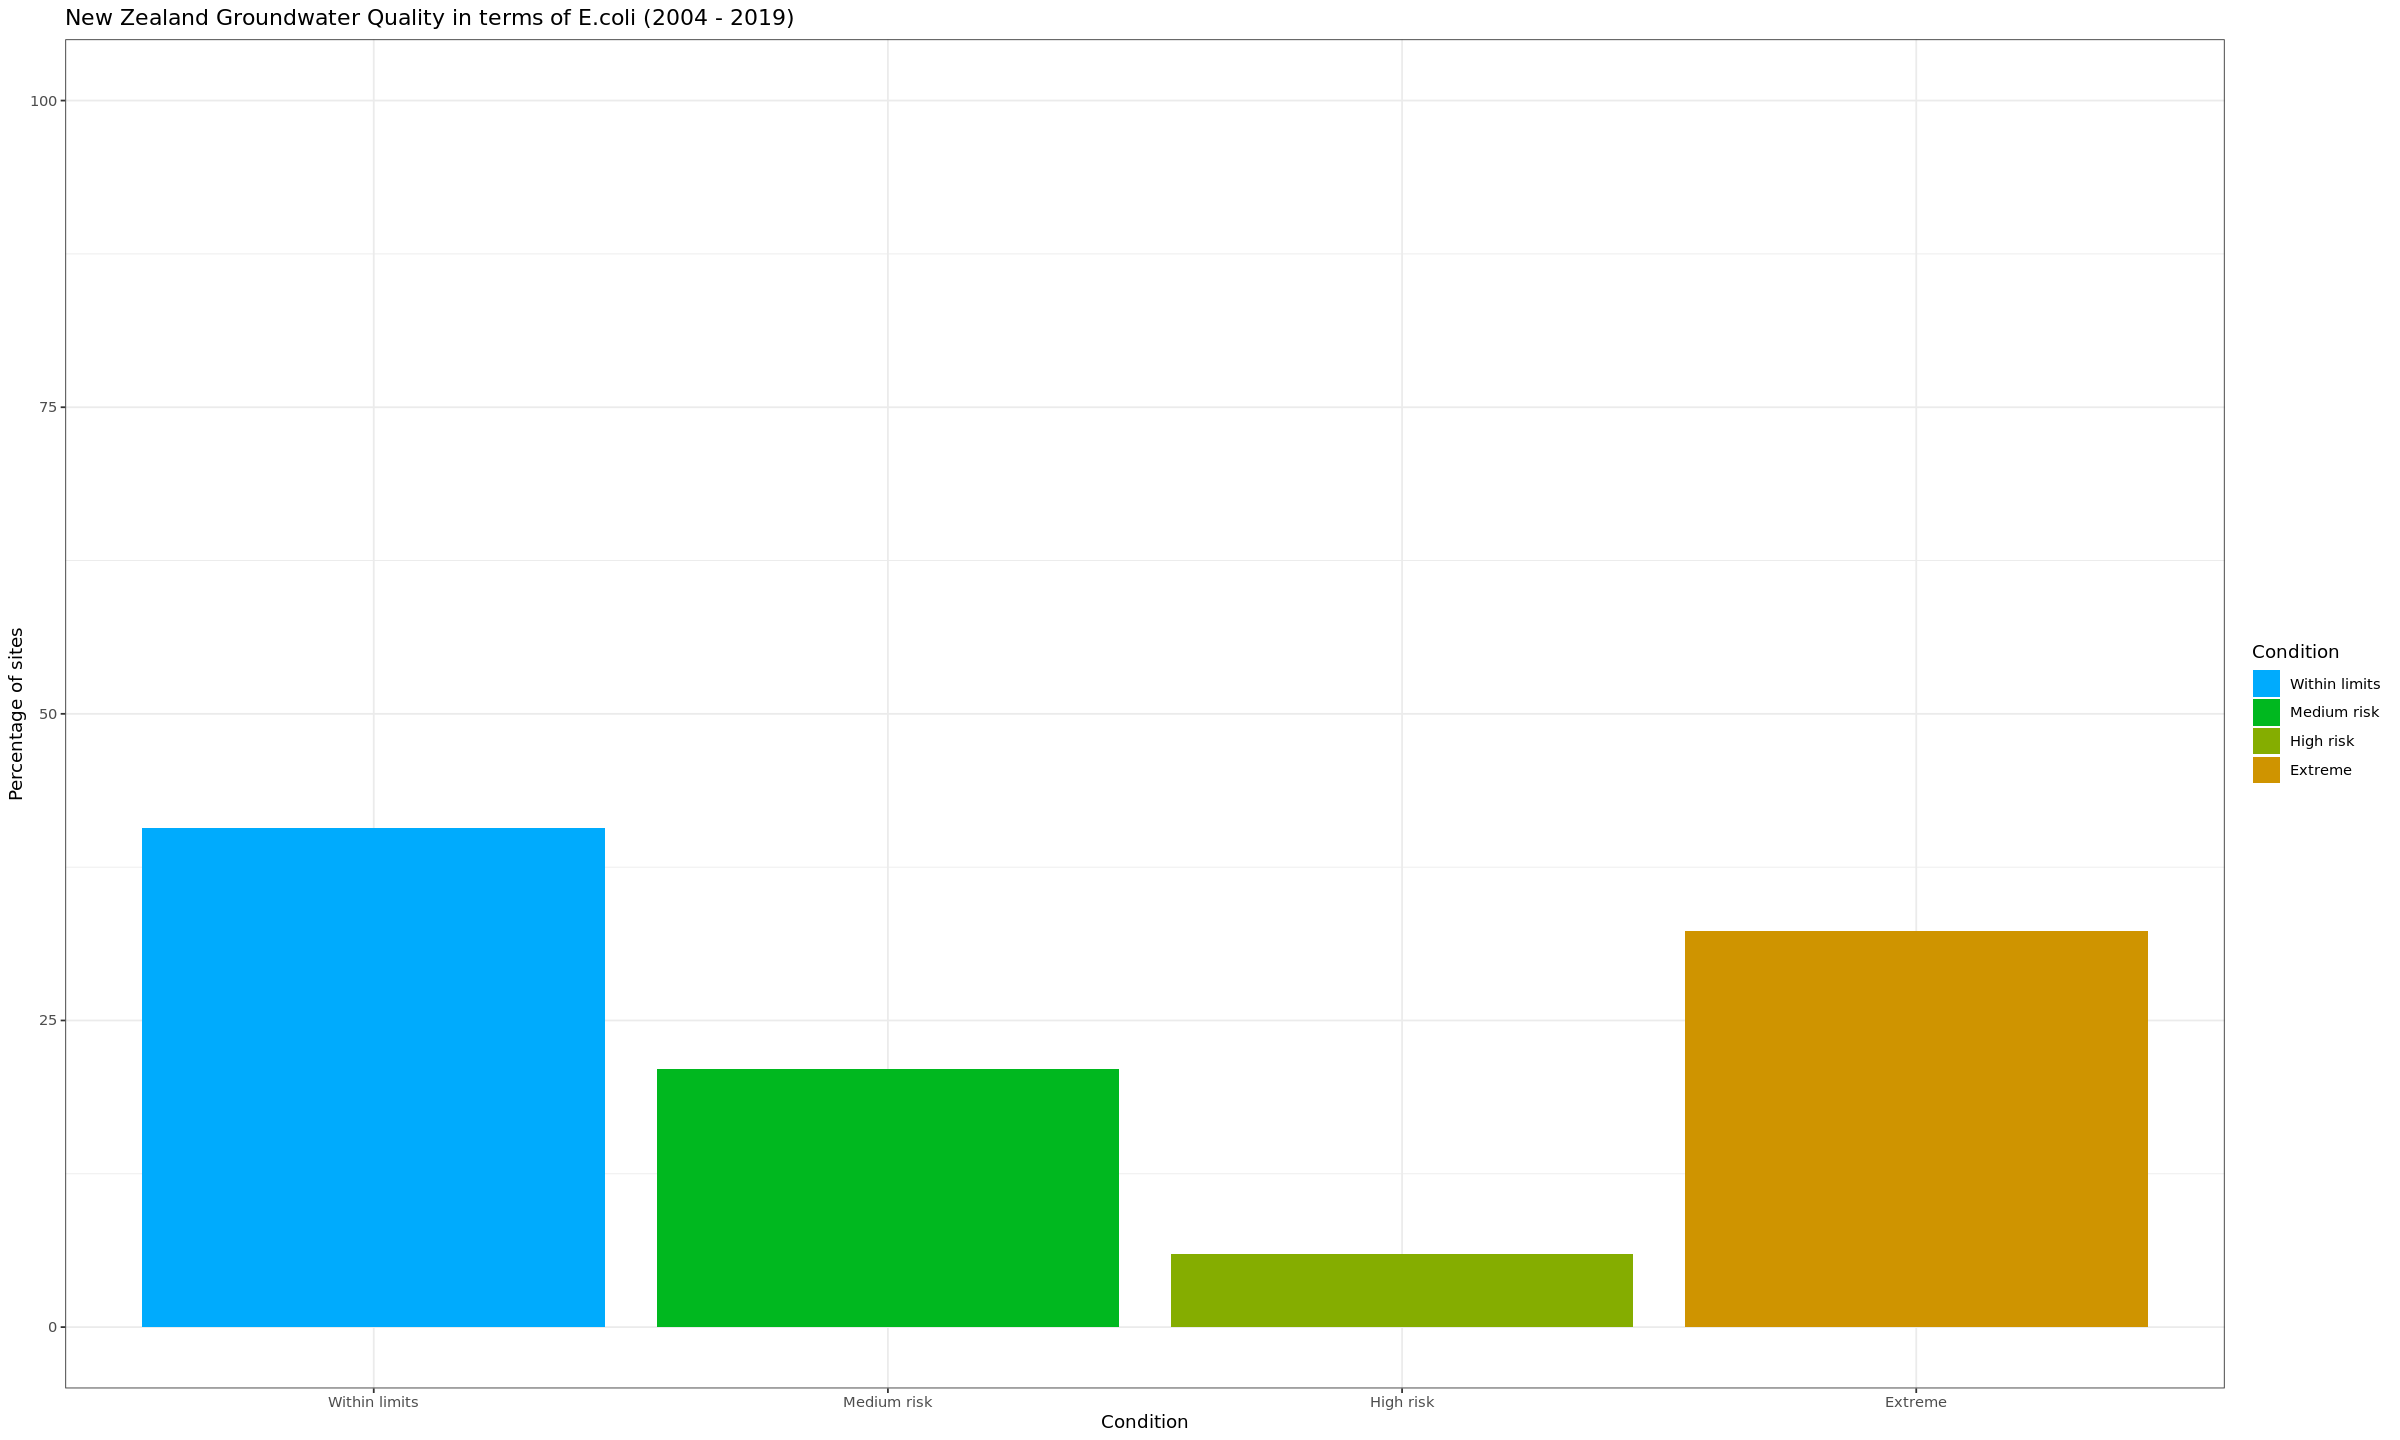

In [36]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites under
# condition bands, and the indicator.
groundwater_ecoli_condition <- sites_quality %>% 
  filter(Indicator == "E.coli cfu/100ml") %>% 
  group_by(WellName) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m == 0 ~ "No risk", 
                            m > 0 & m <= 1 ~ "Within limits",
                            m > 1 & m <= 1.6 ~ "Medium risk",
                            m > 1.6 & m <= 2 ~ "High risk",
                            TRUE ~ "Extreme")) %>% 
  group_by(Condition) %>% 
  summarize(Count = n()) %>% 
  mutate(prop=Count/sum(Count), Indicator="E.coli (cfu/100ml)")

# Change the order of the categorical variable instead in alphabetical order (condition band).
groundwater_ecoli_condition$Condition <- groundwater_ecoli_condition$Condition %>% 
    factor(levels = c("No risk", "Within limits", "Medium risk", "High risk", "Extreme"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
groundwater_ecoli_condition_plot <- groundwater_ecoli_condition %>% 
  ggplot(aes(x =  Condition, y = prop*100, fill = Condition))+
  geom_bar(stat="identity")+
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                               "#85AD00", "#CF9400")) +
  xlab("Condition") +
  ylab("Percentage of sites") +
  ggtitle("New Zealand Groundwater Quality in terms of E.coli (2004 - 2019)") +
  labs(fill = "Condition") +
  ylim(0, 100) + 
  theme_bw()
groundwater_ecoli_condition_plot

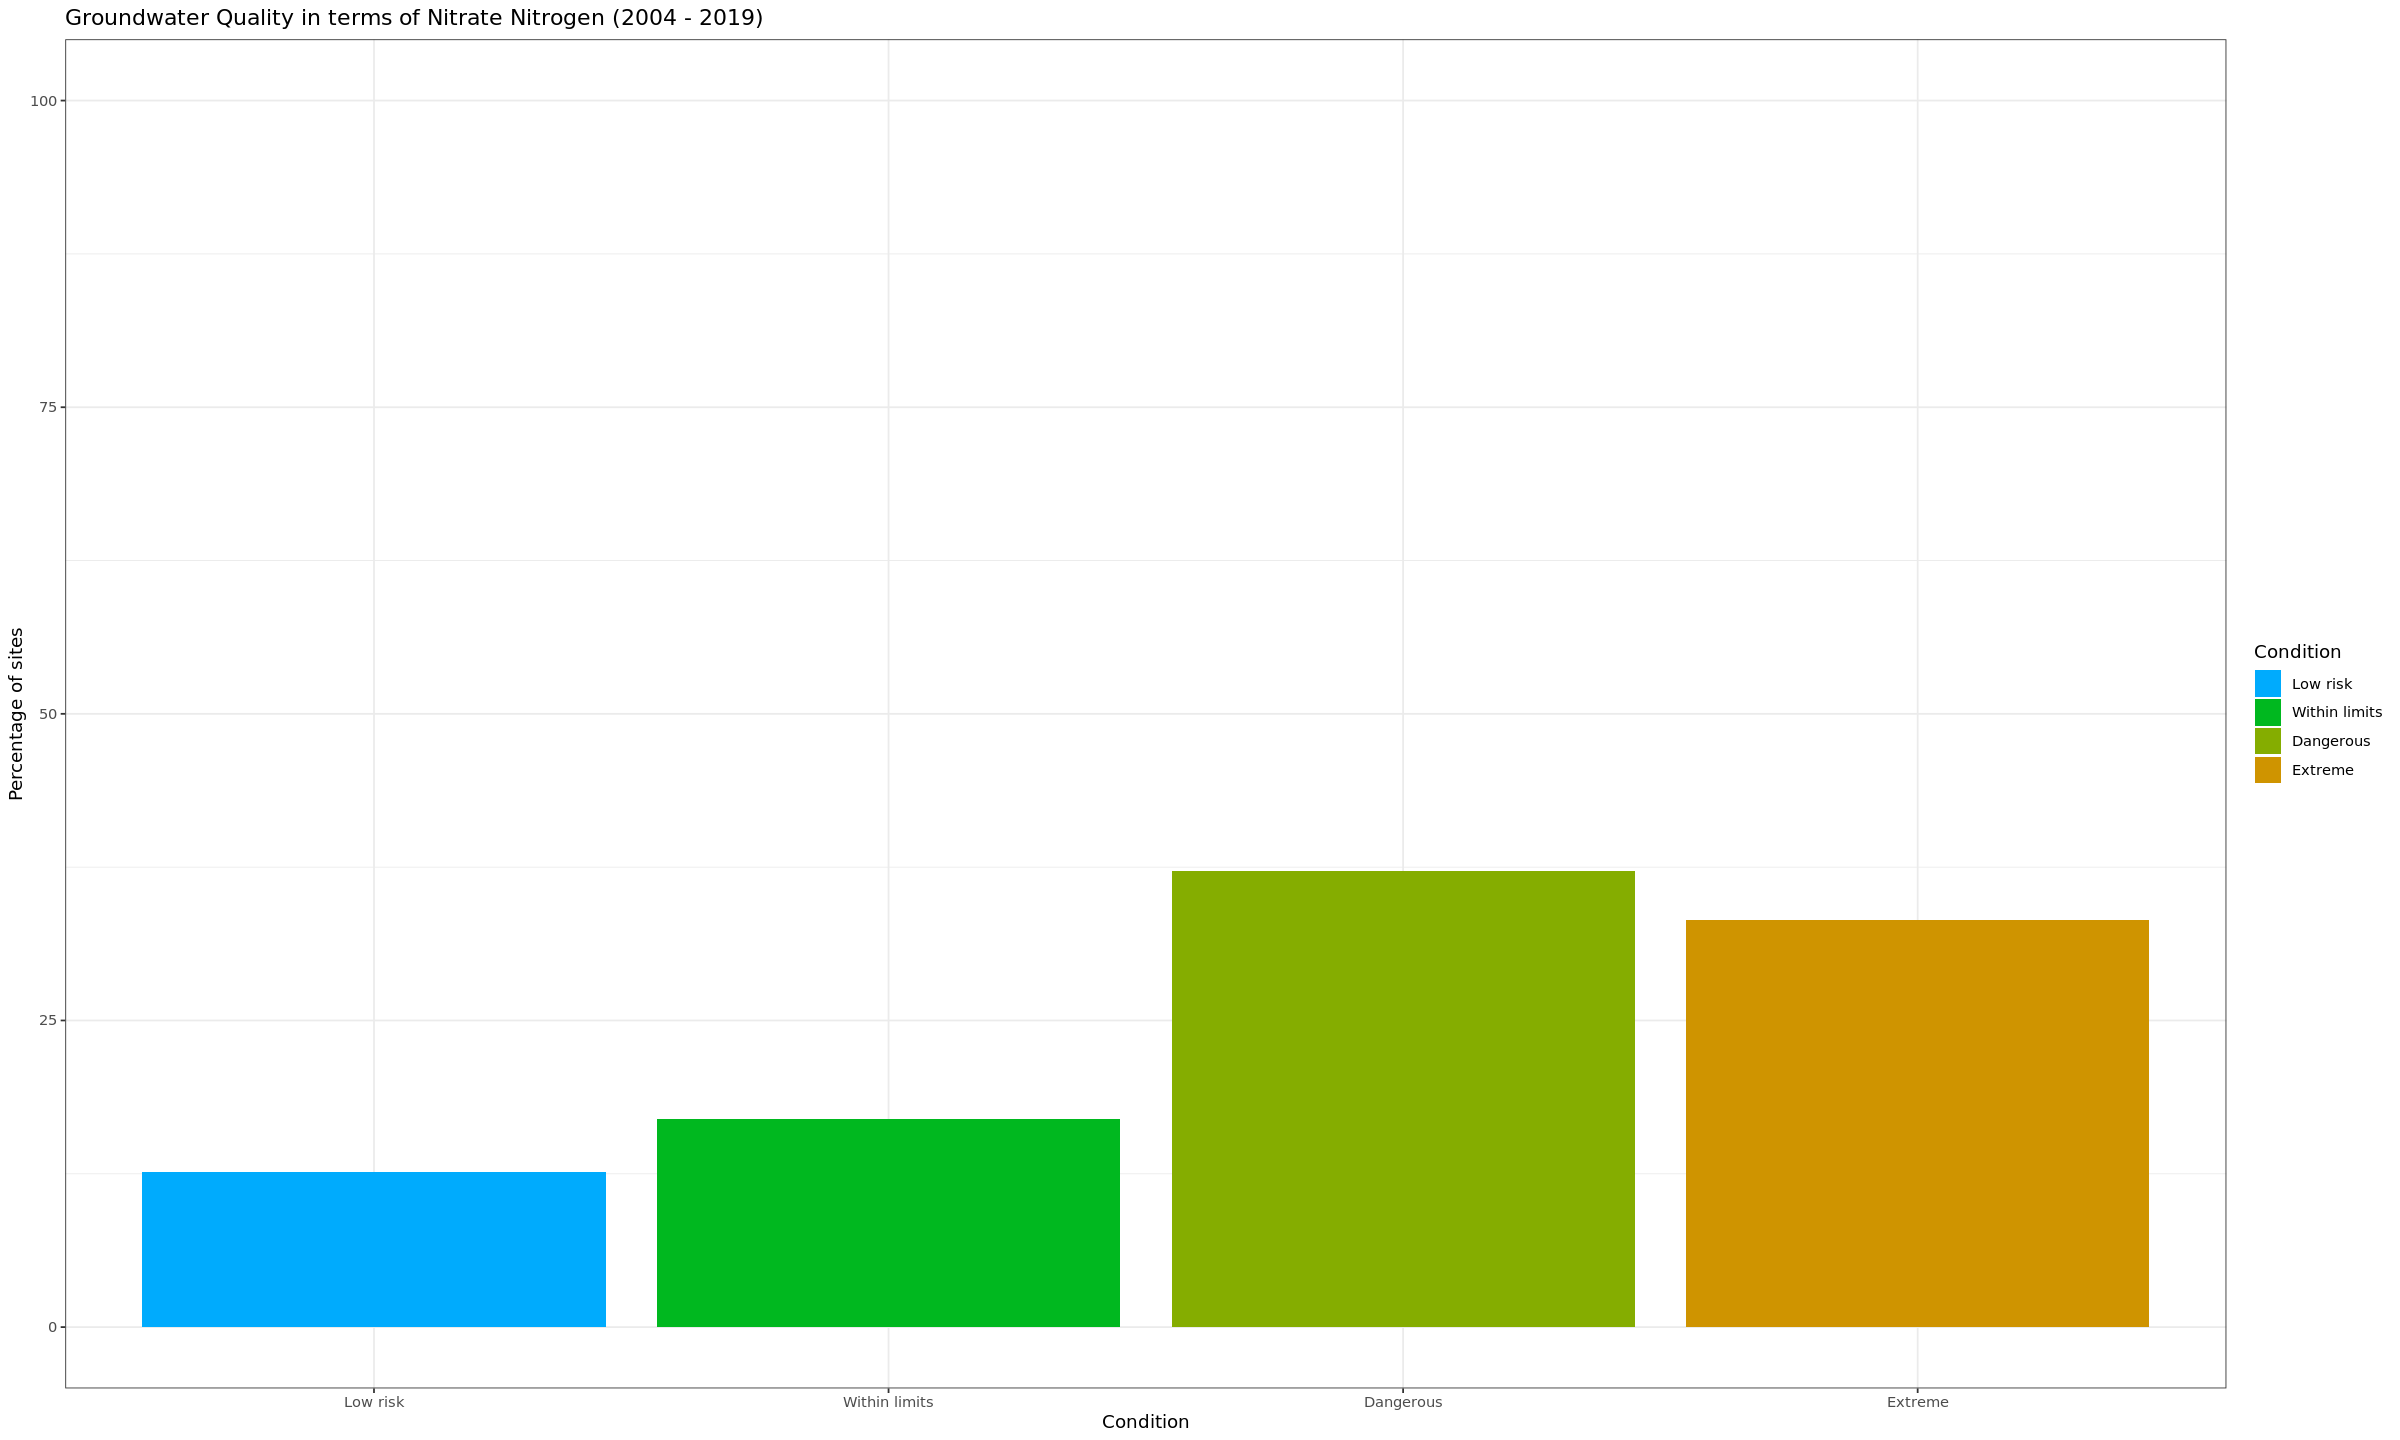

In [35]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites under
# condition bands, and the indicator.
groundwater_nitro_condition <- sites_quality %>% 
  filter(Indicator == "Nitrate nitrogen g/m3") %>% 
  group_by(WellName) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 6 ~ "Low risk", 
                            m > 6 & m <= 11.3 ~ "Within limits",
                            m > 11.3 & m <= 50 ~ "Dangerous",
                            TRUE ~ "Extreme")) %>% 
  group_by(Condition) %>% 
  summarize(Count = n()) %>% 
  mutate(prop=Count/sum(Count), Indicator = "Nitrate nitrogen (g/m3)")

# Change the order of the categorical variable instead in alphabetical order (condition band).
groundwater_nitro_condition$Condition <- groundwater_nitro_condition$Condition %>% 
    factor(levels = c("Low risk", "Within limits", "Dangerous", "Extreme"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
groundwater_nitro_condition_plot <- groundwater_nitro_condition %>%
  ggplot(aes(x =  Condition, y = prop*100, fill = Condition))+
  geom_bar(stat="identity") +
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                               "#85AD00", "#CF9400")) +
  xlab("Condition") +
  ylab("Percentage of sites") +
  ggtitle("Groundwater Quality in terms of Nitrate Nitrogen (2004 - 2019)") +
  labs(fill = "Condition") +
  ylim(0, 100) +
  theme_bw()
groundwater_nitro_condition_plot

<p style="text-align: justify"> The bar plots we created represent the proportion of sites allocated to different condition bands based on whether their average E. coli counts and nitrogen concentration (from 2004 to 2019) exceeded the threshold values. The threshold used for condition allocation is based on the values from different government agencies that we unified. </p>

<h2>River Quality (E. coli & Nitrogen)</h2>

In [42]:
# Gives an overview of river_ecoli such as columns, data types, the possible values, number of rows and columns.
river_ecoli %>% 
    glimpse()

Rows: 7,550
Columns: 69
$ field_1               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ measure_ab            <chr> "ECOLI", "ECOLI", "ECOLI", "ECOLI", "ECOLI", "EC…
$ measure               <chr> "E. coli", "E. coli", "E. coli", "E. coli", "E. …
$ units                 <chr> "cfu/100ml", "cfu/100ml", "cfu/100ml", "cfu/100m…
$ sof                   <chr> "WWL", "CWH", "WWL", "CWLk", "CWH", "WXL", "WWL"…
$ nzsegment             <dbl> 5122005, 4084132, 4085815, 4081484, 4083343, 506…
$ lat                   <dbl> -38.4616, -38.0824, -38.0795, -38.0440, -38.0465…
$ long                  <dbl> 177.8767, 176.2122, 177.1362, 176.3308, 176.9880…
$ s_id                  <chr> "GDC-00027", "EBOP-00010", "EBOP-00011", "EBOP-0…
$ n_obs                 <dbl> 54, 38, 38, 38, 38, 36, 36, 36, 37, 54, 55, 55, …
$ s                     <dbl> -177, 172, 16, 45, 46, 0, 7, 7, -20, 369, 16, -1…
$ var_s                 <dbl> 17951.6667, 6324.0000, 434.0000, 420.3333, 432.0…
$ d             

In [51]:
# Gives an overview of river_nitrogen such as columns, data types, the possible values, number of rows and columns.
# This allow us to select which relevant columns to select.
river_nitrogen %>% 
  glimpse()

Rows: 25,930
Columns: 69
$ field_1               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ measure_ab            <chr> "NH4N", "NH4N", "NH4N", "NH4N", "NH4N", "NH4N", …
$ measure               <chr> "Ammoniacal nitrogen", "Ammoniacal nitrogen", "A…
$ units                 <chr> "g/m3", "g/m3", "g/m3", "g/m3", "g/m3", "g/m3", …
$ sof                   <chr> "WWL", "WWL", "WWL", "WDL", "WDL", "WWL", "WDL",…
$ nzsegment             <dbl> 2038450, 2031444, 2038644, 2040105, 2035880, 203…
$ lat                   <dbl> -36.8889, -36.3450, -36.8949, -36.9623, -36.7320…
$ long                  <dbl> 174.5221, 174.7118, 174.5947, 174.8800, 174.6947…
$ s_id                  <chr> "ARC-00001", "ARC-00008", "ARC-00013", "ARC-0001…
$ n_obs                 <dbl> 116, 115, 118, 108, 118, 117, 120, 119, 118, 120…
$ s                     <dbl> -1496, 338, 821, -67, -1443, 424, -19, -581, -10…
$ var_s                 <dbl> 130591.6667, 168395.3333, 181606.3333, 141435.66…
$ d            

<p style="text-align: justify"> Glimpse displays information about river quality in terms of E. coli and nitrogen, with additional information about its physical location based on the columns appended to the original dataset when the latitude and longitude are converted. </p>

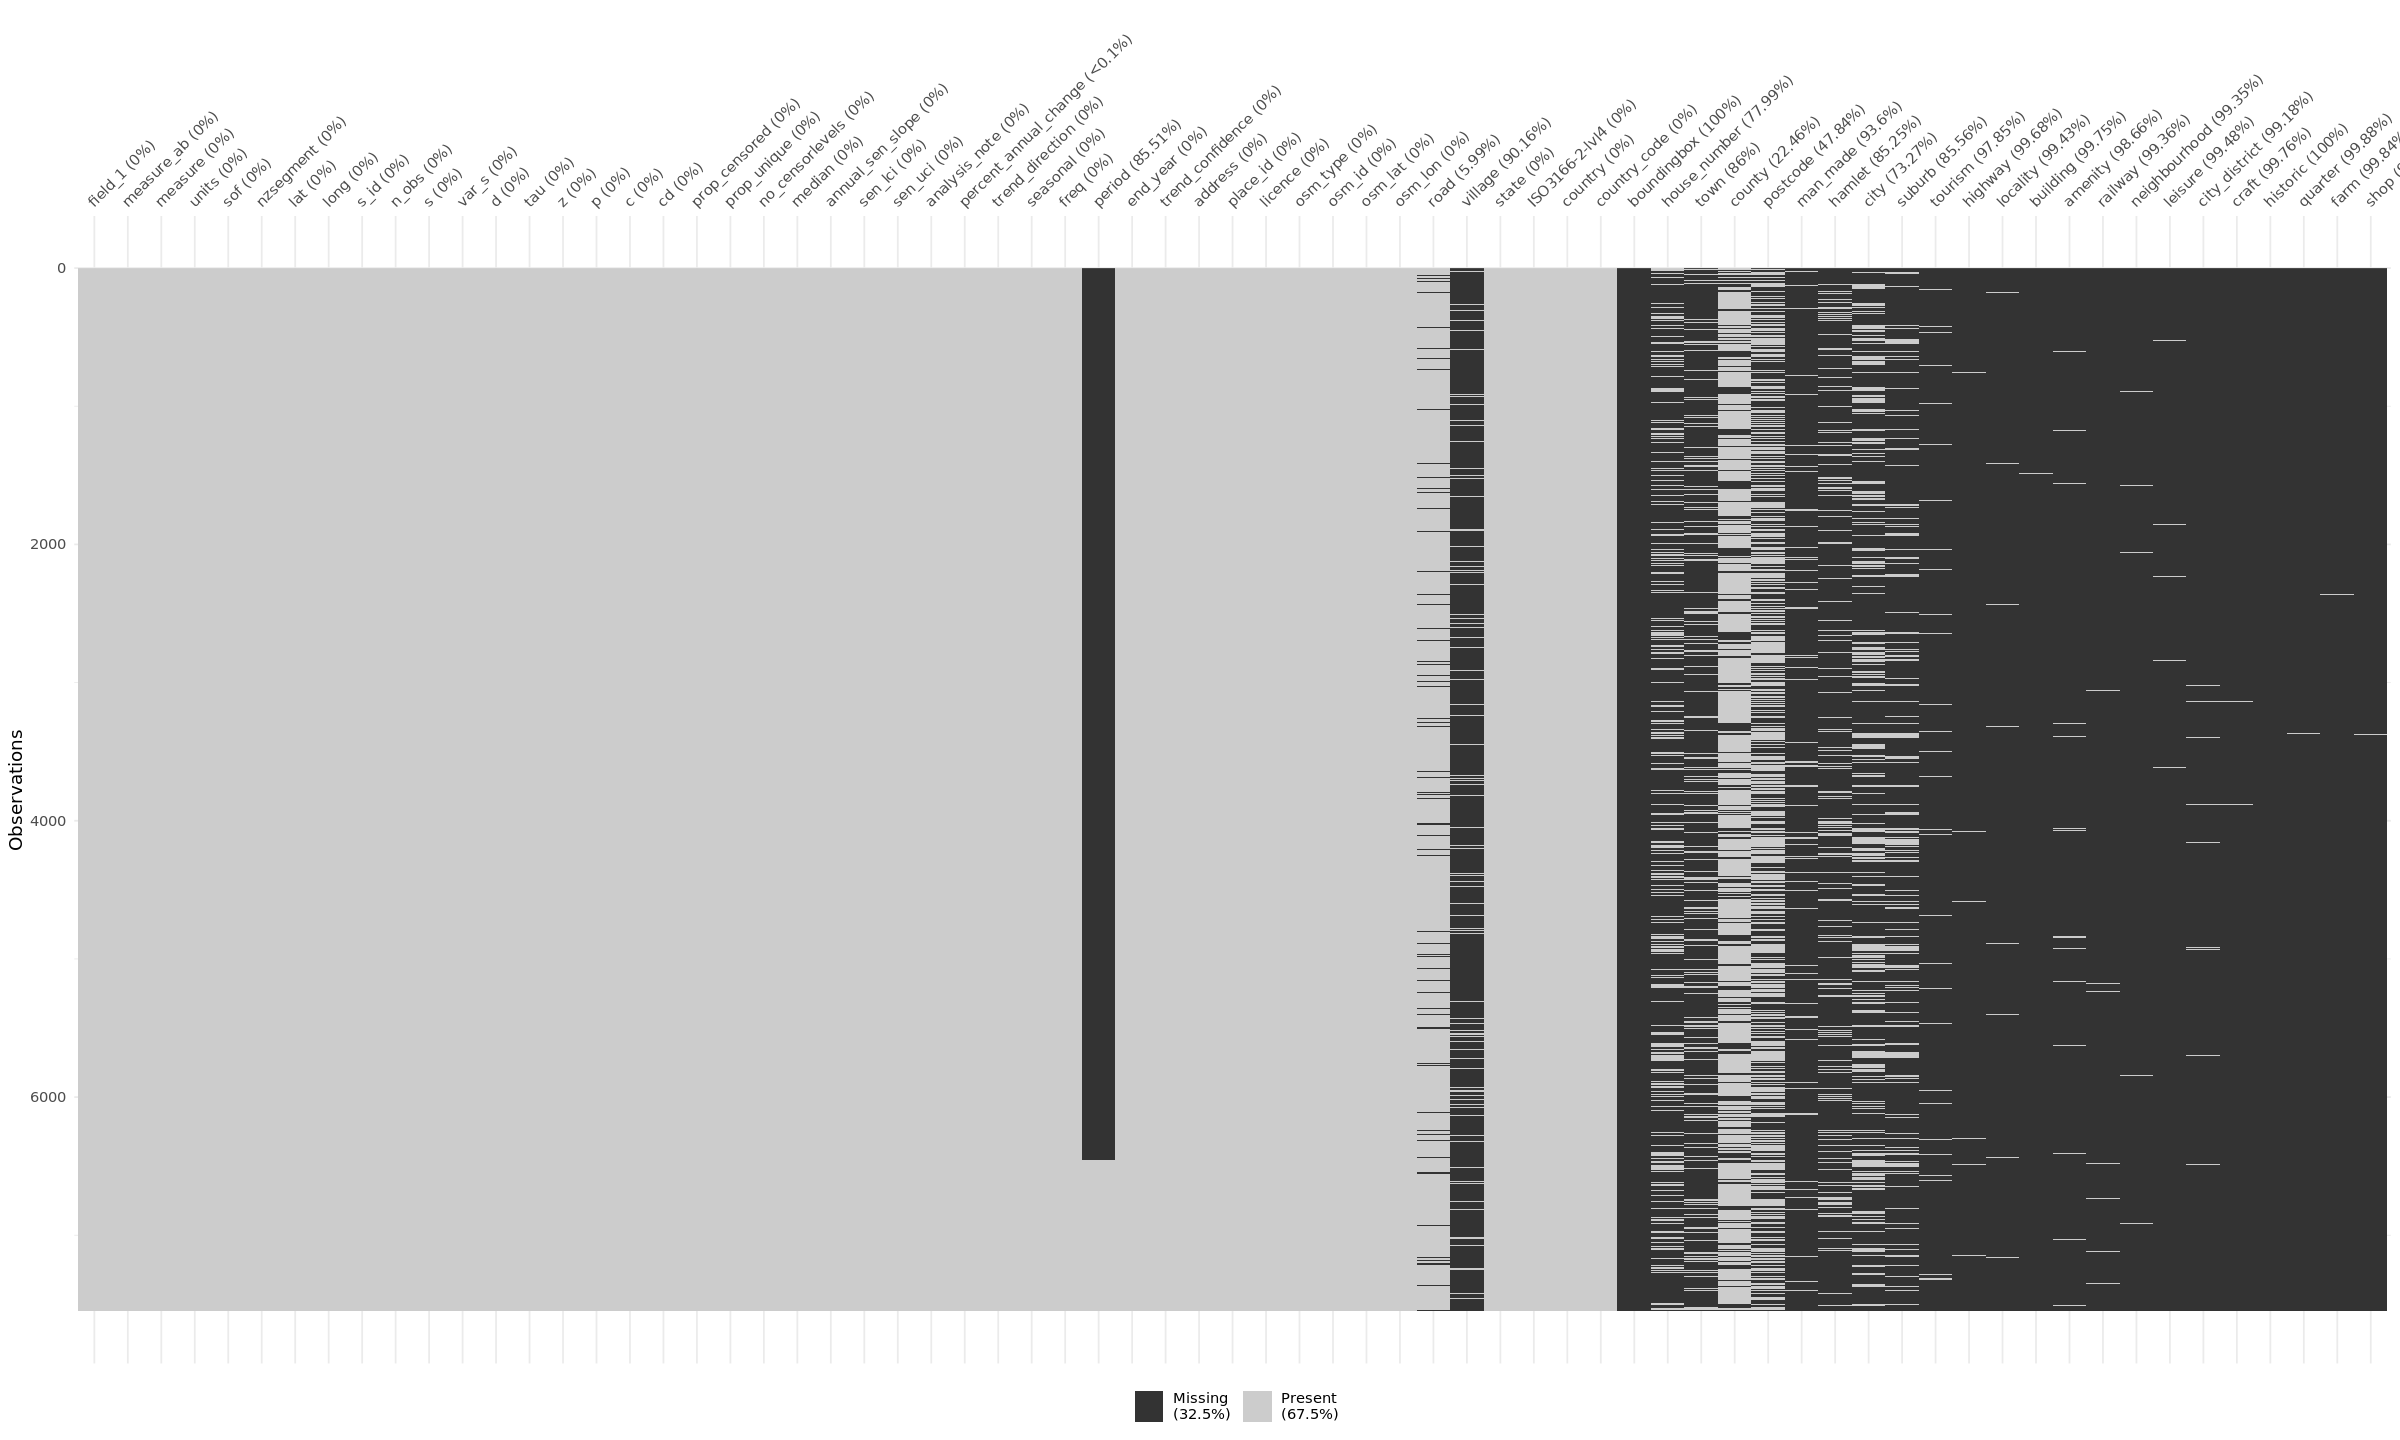

In [43]:
# Reads the entirety of river_ecoli and creates a plot to check if it contains missing data (NA).
river_ecoli %>% 
  vis_miss()

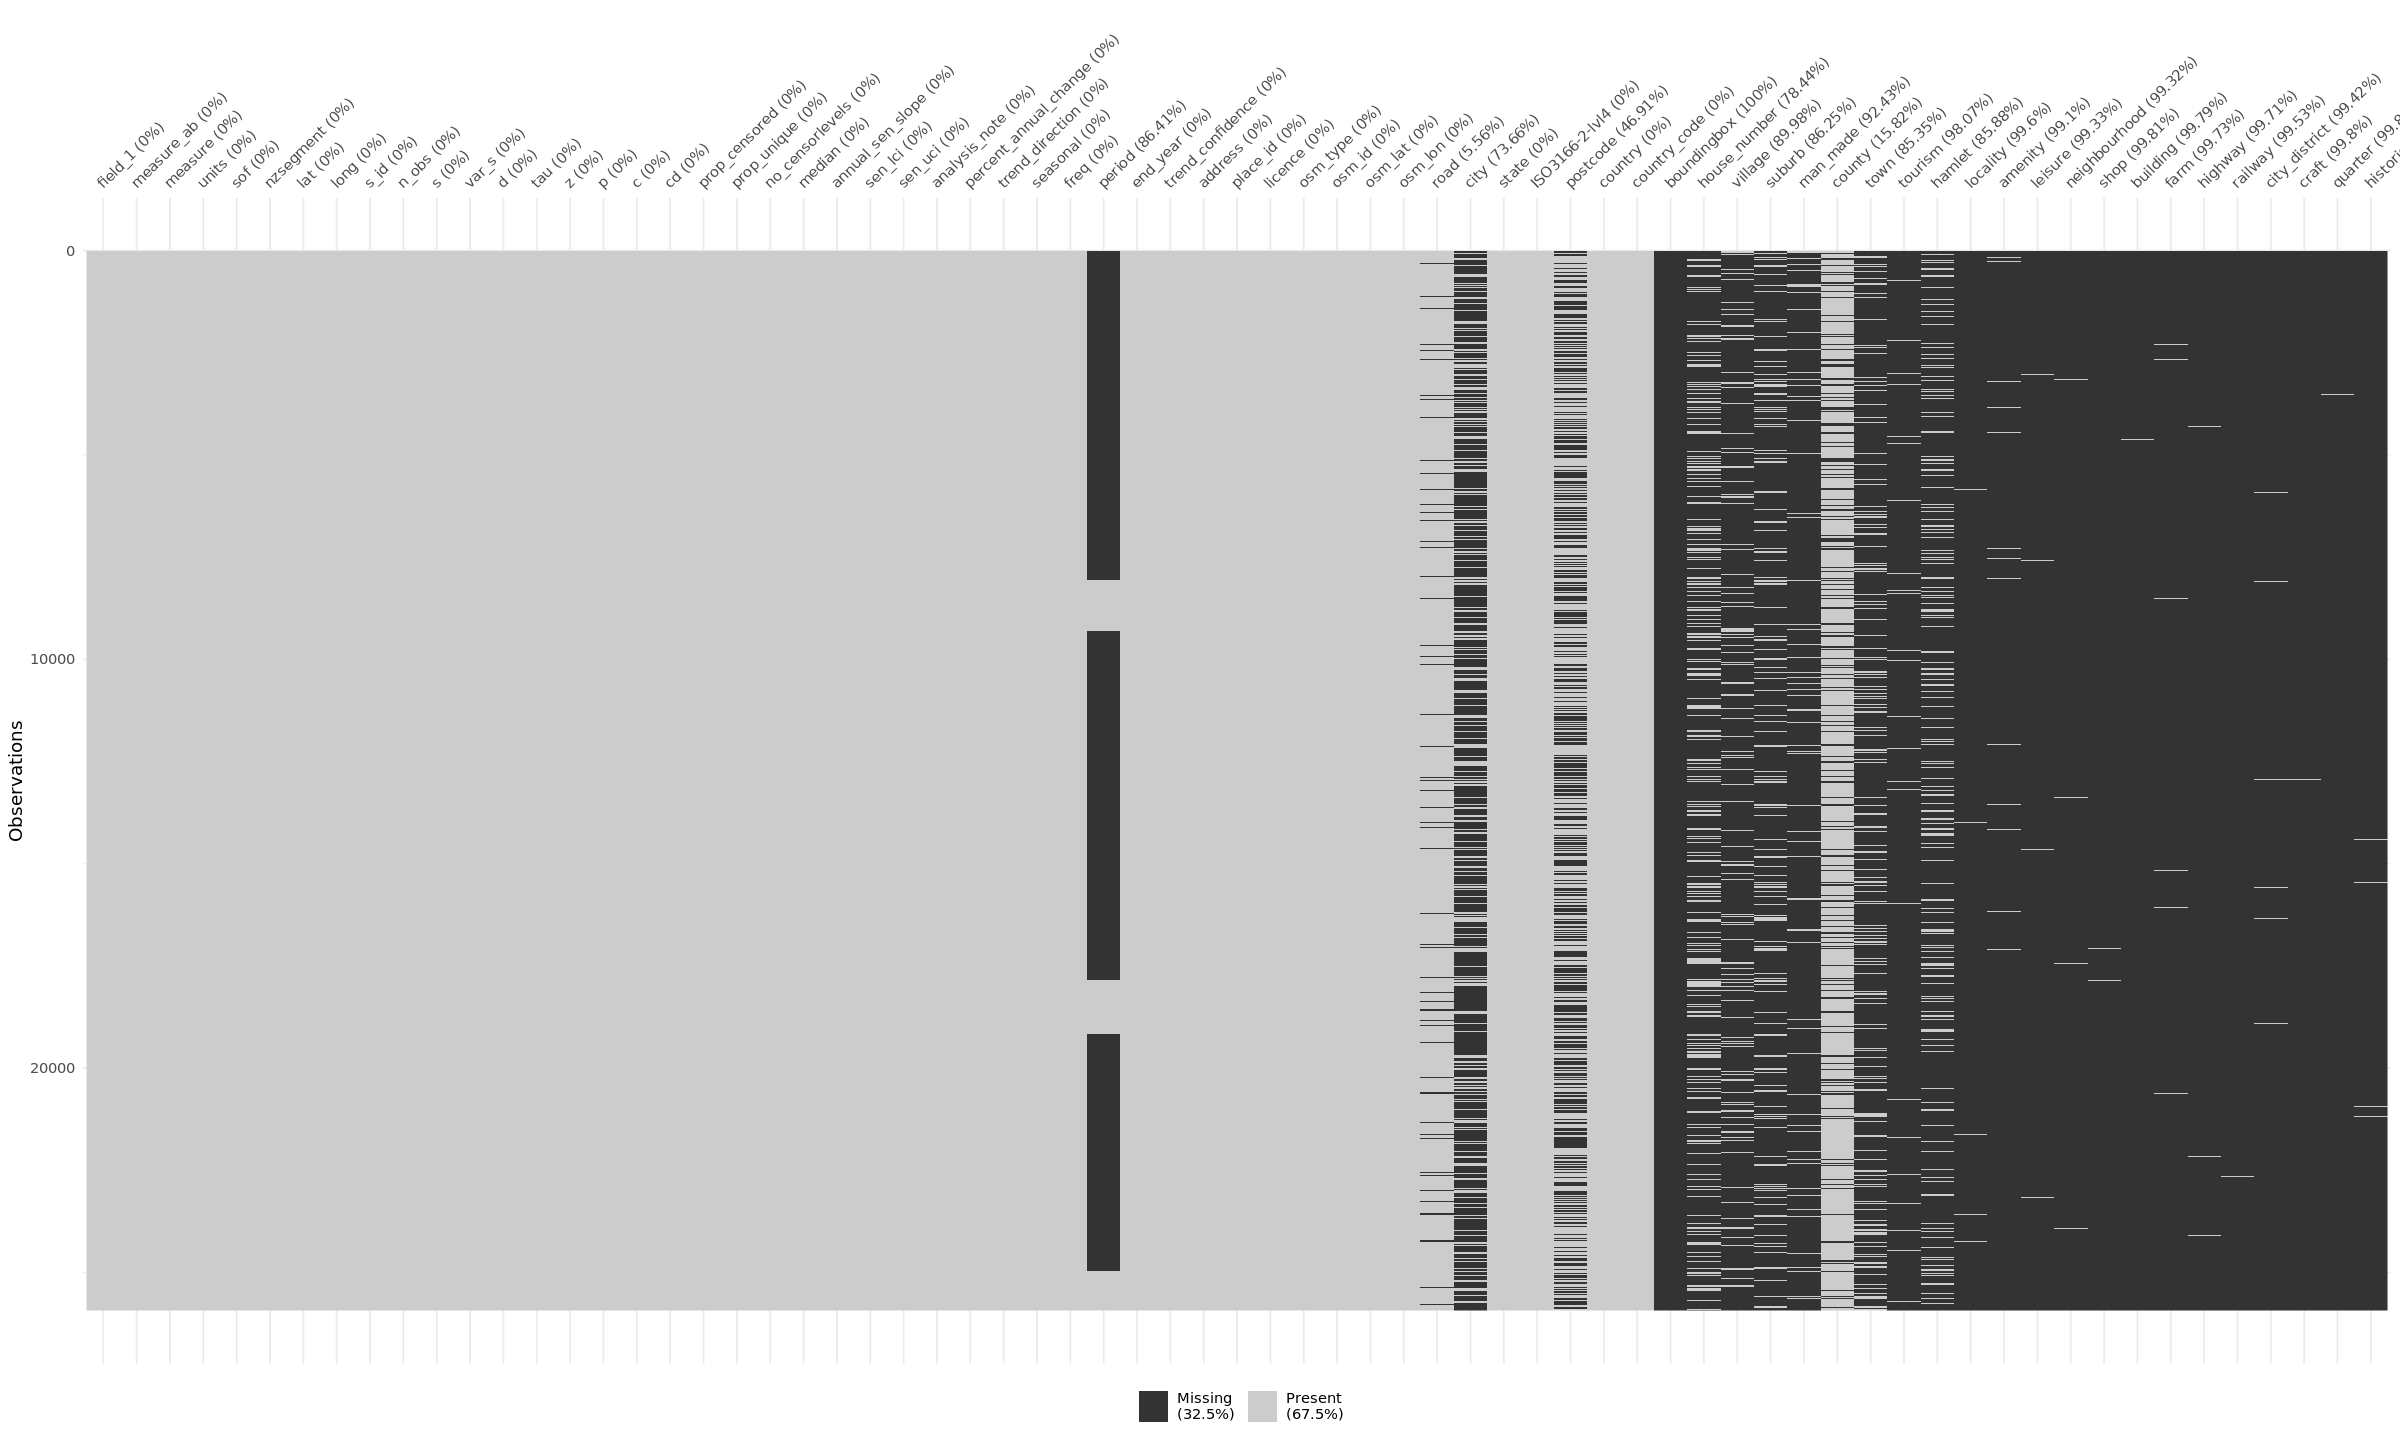

In [53]:
# Reads the entirety of river_nitrogen and creates a plot to check if it contains missing data (NA). 
river_nitrogen %>% 
  vis_miss(warn_large_data = FALSE)

<p style="text-align: justify"> Most of the missing values are attributed to the additional column about the river sites' location. The missing values for the period column are due to some of the records being the measurements observed in n-periods. </p>

In [48]:
# Takes the river_ecoli rename the columns, standardise the indicators, select the relevant columns and rows. 
new_river_ecoli <- river_ecoli %>% 
  rename(Region = state, Year = end_year, Indicator = measure, Median = median, Units = units, S_ID = s_id,
         Latitude = lat, Longitude = long) %>% 
  mutate(Indicator = "E.coli cfu/100ml") %>% 
  select(Region, Year, S_ID, Median, Indicator, Latitude, Longitude) %>% 
  filter(Year >= 2002, Year <= 2019)
new_river_ecoli %>% 
    head()

Region,Year,S_ID,Median,Indicator,Latitude,Longitude
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Gisborne,2002,GDC-00002,80.5,E.coli cfu/100ml,-37.6746,178.3481
Gisborne,2002,GDC-00003,231.0,E.coli cfu/100ml,-38.2039,178.2558
Gisborne,2002,GDC-00004,297.0,E.coli cfu/100ml,-38.2923,178.2692
Gisborne,2002,GDC-00016,434.0,E.coli cfu/100ml,-38.6342,177.9682
Gisborne,2002,GDC-00020,219.0,E.coli cfu/100ml,-38.6683,178.0199
Gisborne,2002,GDC-00021,209.0,E.coli cfu/100ml,-38.4268,177.7224


In [56]:
# Takes river_nitrogen rename the columns, get the rows from 2002 to 2009 with ammoniacal nitrogen and nitrate(-nitrite) nitrogen
# as indicators, standardise the indicators, and select the necessary columns.
new_river_nitrogen <- river_nitrogen %>% 
  rename(Region = state, Year = end_year, Indicator = measure, Median = median, Units = units, S_ID = s_id,
         Latitude = lat, Longitude = long) %>% 
  filter(Year >= 2002, Year <= 2019, Indicator %in% c("Ammoniacal nitrogen", "Nitrate-nitrite nitrogen")) %>%
  mutate(Indicator = case_when(Indicator == "Ammoniacal nitrogen" ~ "Ammoniacal nitrogen g/m3",
                               TRUE ~ "Nitrate-nitrite nitrogen g/m3")) %>%
  select(Region, Year, S_ID, Median, Indicator, Latitude, Longitude)
new_river_nitrogen %>% 
    head()

Region,Year,S_ID,Median,Indicator,Latitude,Longitude
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Auckland,2002,ARC-00001,0.0080,Ammoniacal nitrogen g/m3,-36.8889,174.5221
Auckland,2002,ARC-00008,0.0300,Ammoniacal nitrogen g/m3,-36.3450,174.7118
Waikato,2002,ARC-00009,0.0100,Ammoniacal nitrogen g/m3,-37.1955,174.9735
Auckland,2002,ARC-00013,0.0285,Ammoniacal nitrogen g/m3,-36.8949,174.5947
Auckland,2002,ARC-00015,0.0450,Ammoniacal nitrogen g/m3,-36.9623,174.8800
Auckland,2002,ARC-00016,0.0610,Ammoniacal nitrogen g/m3,-36.9557,174.8906


<p style="text-align: justify"> Similar to groundwater quality data, there are two measures of E. coli count and nitrogen concentration, which are equivalent so we proceed to use cfu/100ml and g/m3. Moreover, we concatenated the indicator and units. </p>

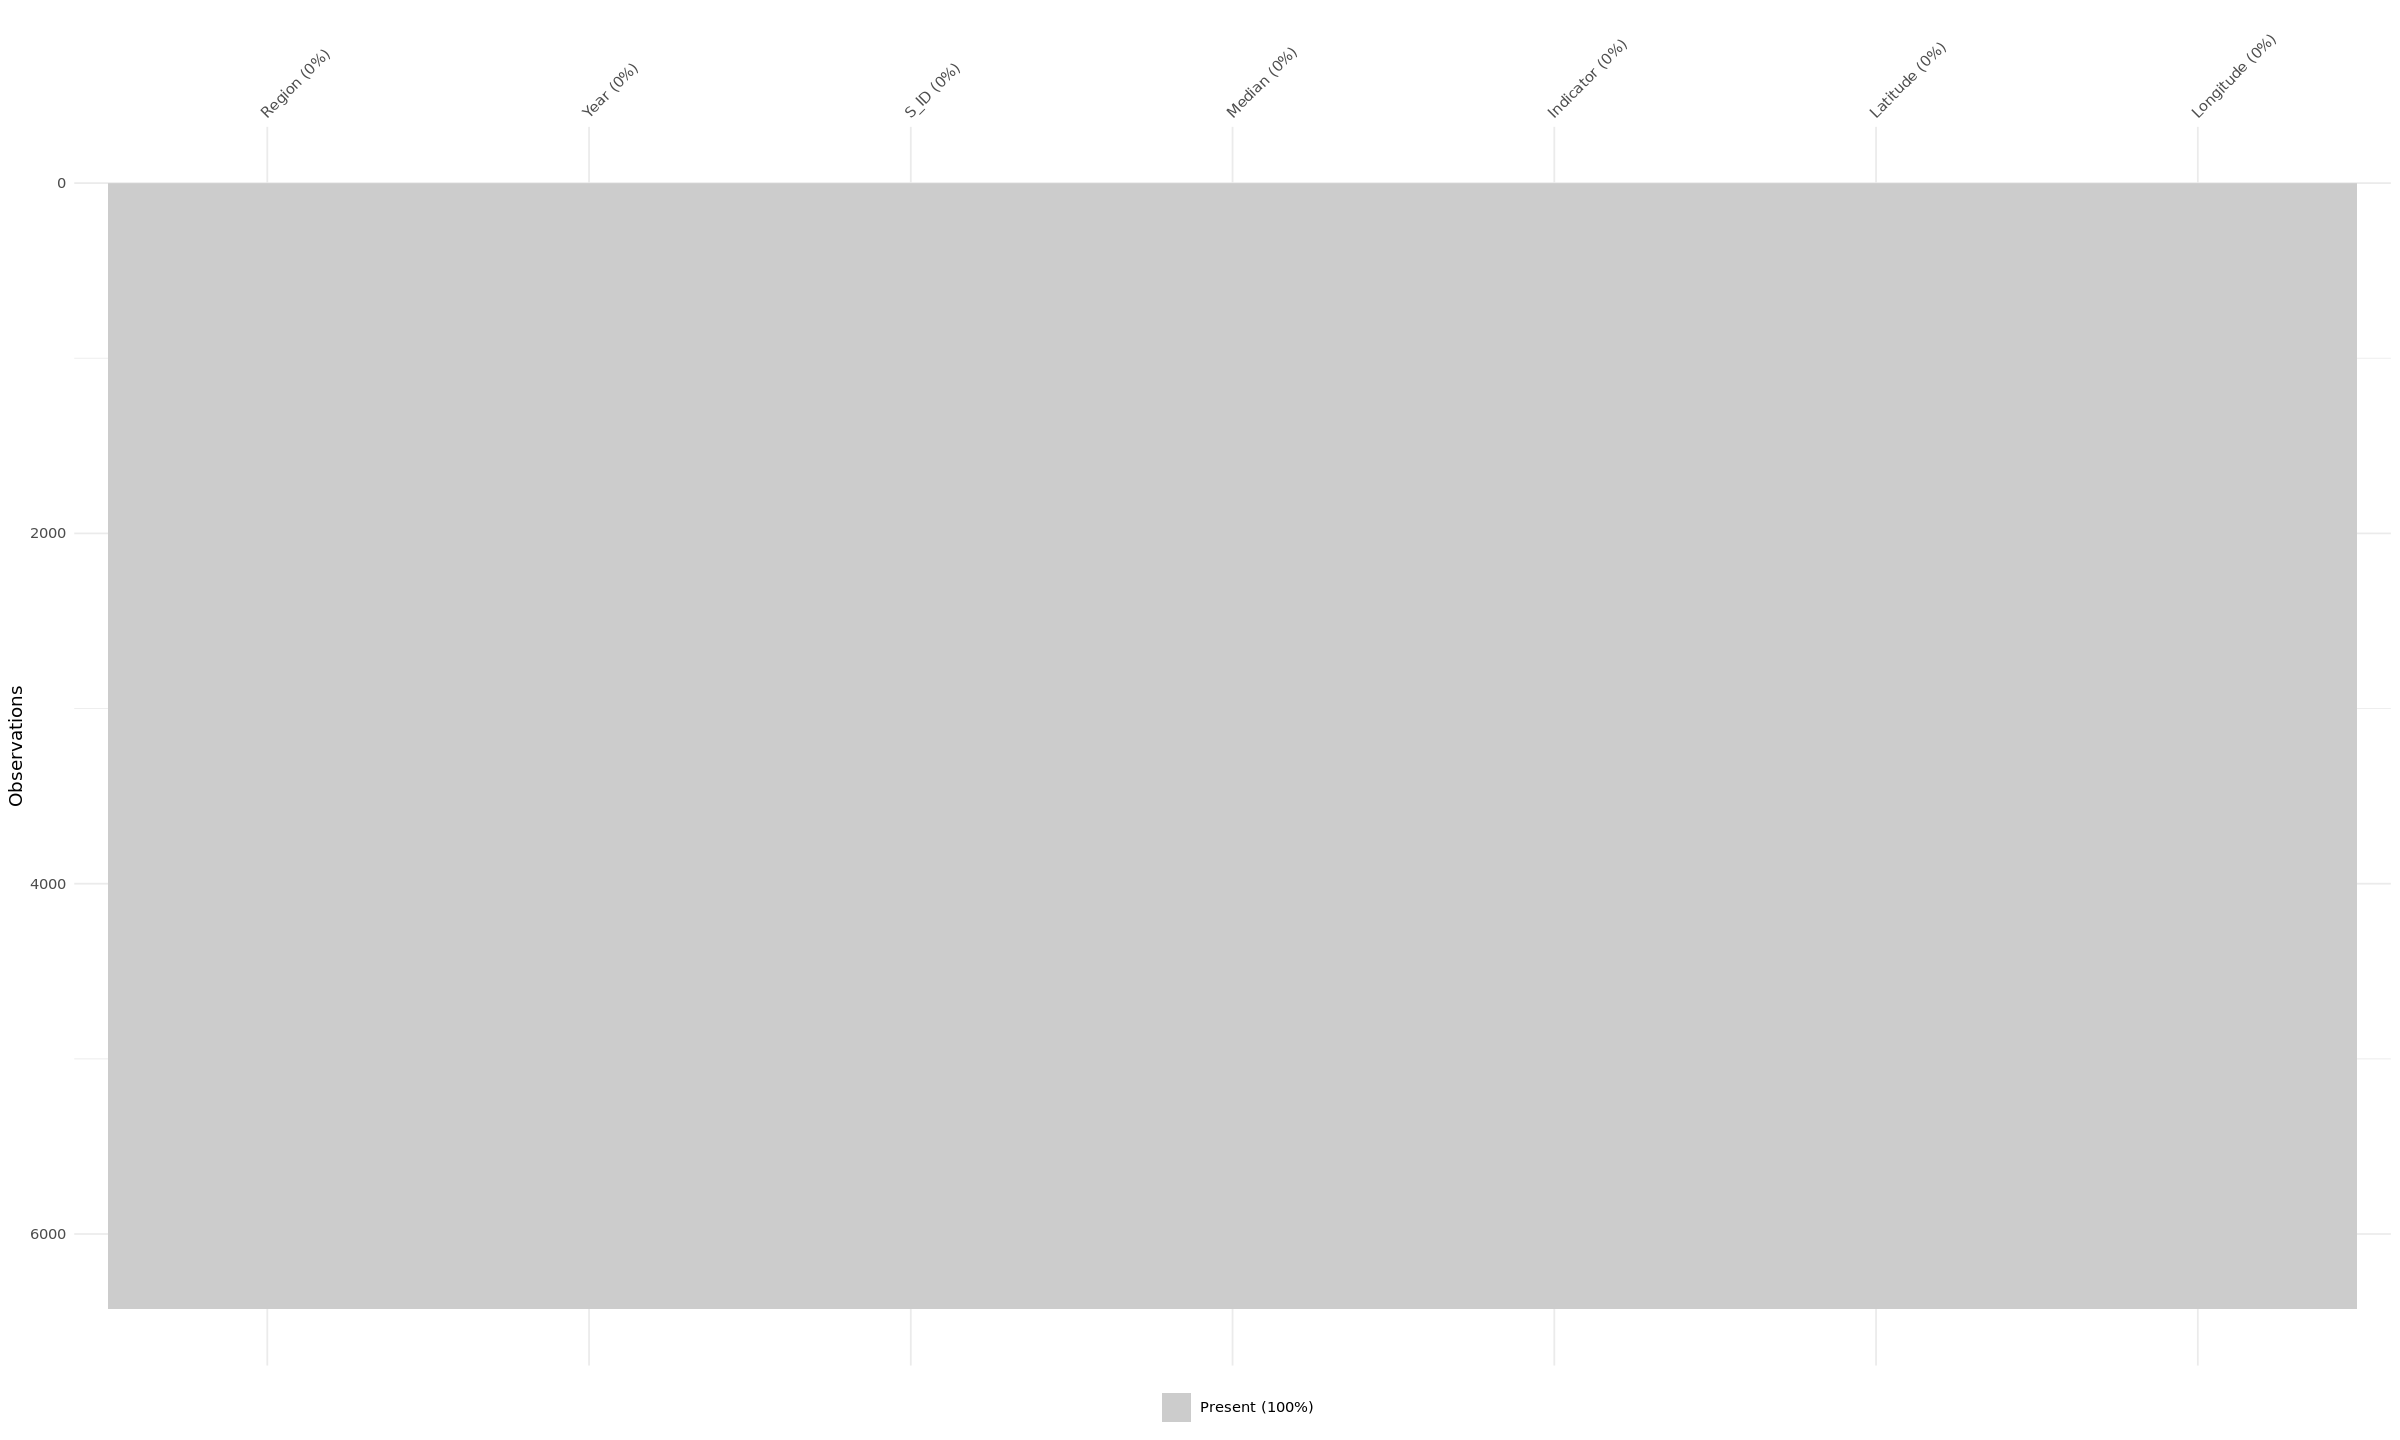

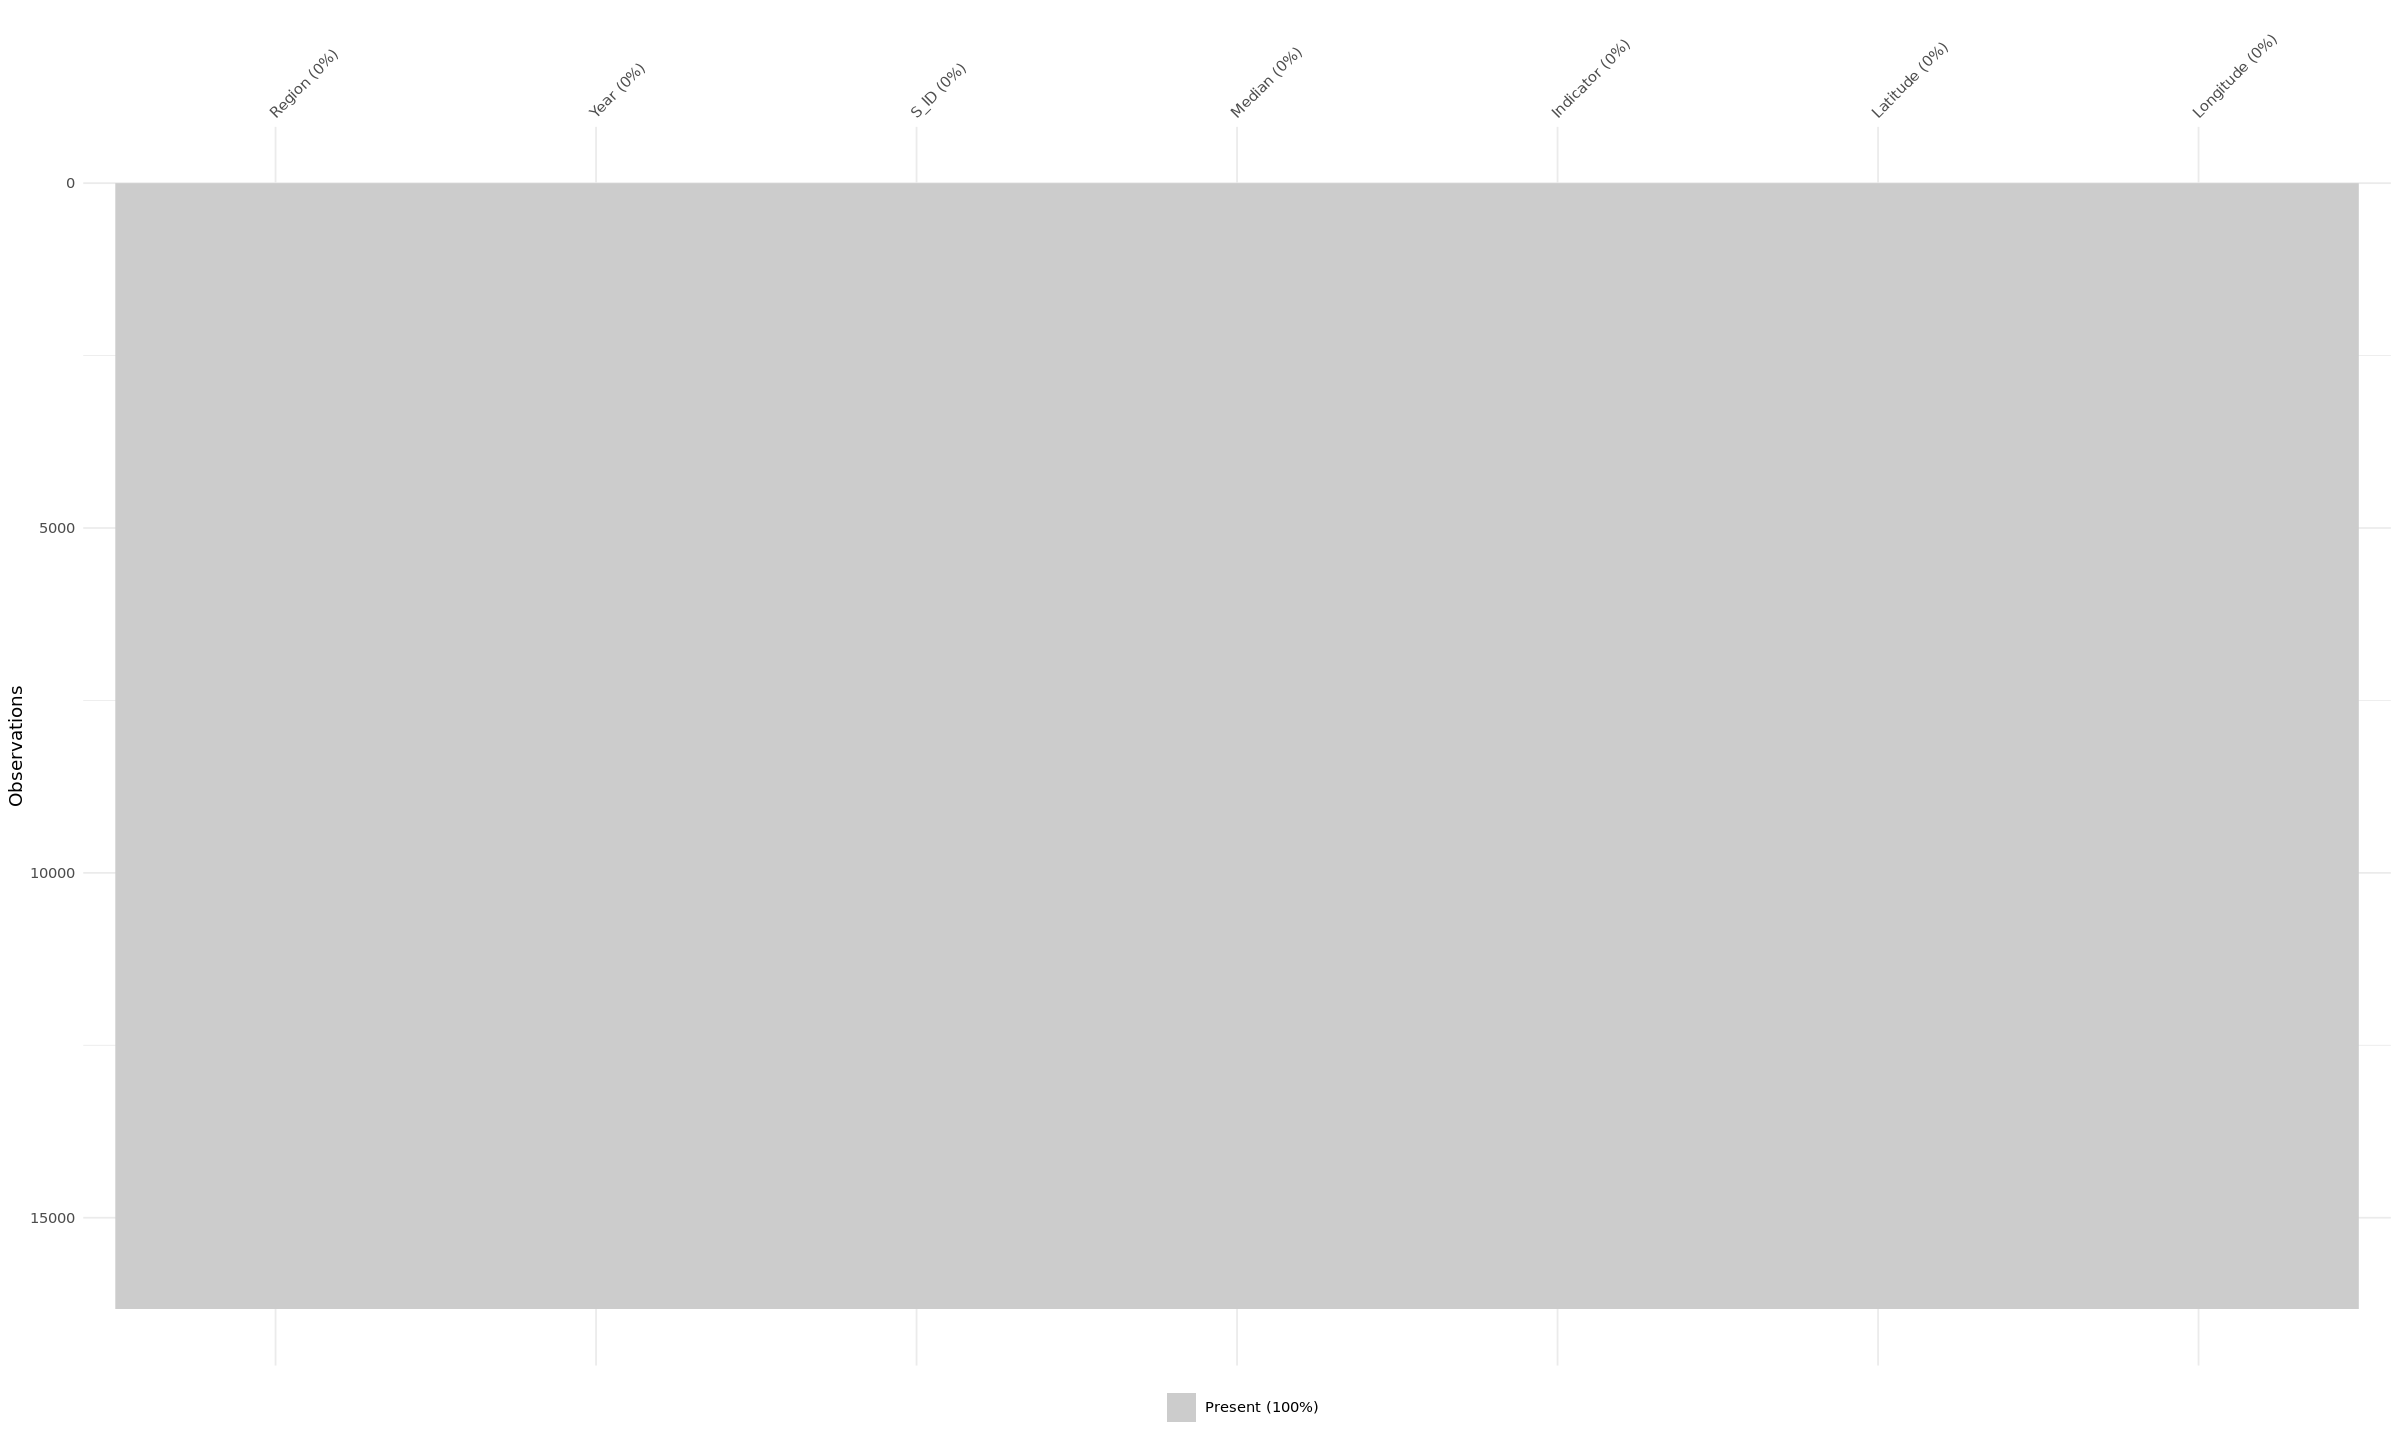

In [57]:
# Check for missing data again (NA)
new_river_ecoli %>% 
  vis_miss()

new_river_nitrogen %>% 
    vis_miss()

In [49]:
# Takes the new_river_ecoli select the relevant columns, group the rows by Region, Year, Site ID, and Indicator,
# summarise the mean for each site across NZ in specific year.
river_src_quality_ecoli <- new_river_ecoli %>% 
  select(Region, Year, S_ID, Median, Indicator) %>% 
  group_by(Region, Year, S_ID, Indicator) %>% 
  summarise(MeanVal = mean(Median))
river_src_quality_ecoli %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'S_ID'. You can override using the `.groups` argument.


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2009,ARC-00014,E.coli cfu/100ml,2200
Auckland,2009,ARC-00015,E.coli cfu/100ml,1900
Auckland,2009,ARC-00018,E.coli cfu/100ml,2400
Auckland,2009,ARC-00019,E.coli cfu/100ml,385
Auckland,2010,ARC-00014,E.coli cfu/100ml,2100
Auckland,2010,ARC-00015,E.coli cfu/100ml,1600


In [58]:
# Takes the new_river_nitrogen select the relevant columns, group the rows by Region, Year, Site ID, and Indicator,
# summarise the mean for each site across NZ in specific year.
river_src_quality_nitrogen <- new_river_nitrogen %>% 
  select(Region, Year, S_ID, Median, Indicator) %>% 
  group_by(Region, Year, S_ID, Indicator) %>% 
  summarise(MeanVal = mean(Median))
river_src_quality_nitrogen %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'S_ID'. You can override using the `.groups` argument.


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2002,ARC-00001,Ammoniacal nitrogen g/m3,0.0080
Auckland,2002,ARC-00001,Nitrate-nitrite nitrogen g/m3,0.0170
Auckland,2002,ARC-00003,Ammoniacal nitrogen g/m3,0.0440
Auckland,2002,ARC-00003,Nitrate-nitrite nitrogen g/m3,0.4630
Auckland,2002,ARC-00004,Ammoniacal nitrogen g/m3,0.0500
Auckland,2002,ARC-00004,Nitrate-nitrite nitrogen g/m3,0.2765


<p style="text-align: justify"> The data frame shows the mean E. coli counts and nitrogen concentration of each recorded river sites across New Zealand annually (from 2002 to 2019). </p>

In [50]:
# Takes the new_river_ecoli select the relevant columns about sites' coordinates, and then get the unique 
# entries of the river sites across NZ.
river_src_ecoli <- new_river_ecoli %>% 
  select(Region, S_ID, Latitude, Longitude) %>% 
  distinct()
river_src_ecoli %>% 
    head()

Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Gisborne,GDC-00002,-37.6746,178.3481
Gisborne,GDC-00003,-38.2039,178.2558
Gisborne,GDC-00004,-38.2923,178.2692
Gisborne,GDC-00016,-38.6342,177.9682
Gisborne,GDC-00020,-38.6683,178.0199
Gisborne,GDC-00021,-38.4268,177.7224


In [60]:
# Takes the new_river_nitrogen select the relevant columns about sites' coordinates, and then get the unique 
# entries of the river sites across NZ.
river_src_nitrogen <- new_river_nitrogen %>%
  select(Region, S_ID, Latitude, Longitude) %>%
  distinct()
river_src_nitrogen %>% 
    head()

Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Auckland,ARC-00001,-36.8889,174.5221
Auckland,ARC-00008,-36.3450,174.7118
Waikato,ARC-00009,-37.1955,174.9735
Auckland,ARC-00013,-36.8949,174.5947
Auckland,ARC-00015,-36.9623,174.8800
Auckland,ARC-00016,-36.9557,174.8906


<p style="text-align: justify"> The data frame contains the river site ID, the region where it is in, and its coordinates. </p>

In [64]:
# Join river_src_quality_ecoli and river_src_nitrogen to create river_quality dataframe.
river_quality <- river_src_quality_ecoli %>% 
  full_join(river_src_quality_nitrogen)
river_quality %>% 
    head()

# Join river_src_ecoli and river_src_nitrogen to create a data frame containing 
# all of the river sites and its coordinates across NZ.
river_src <- river_src_ecoli %>% 
  full_join(river_src_nitrogen) %>% 
  distinct()
river_src %>% 
    head()

Joining, by = c("Region", "Year", "S_ID", "Indicator", "MeanVal")


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2009,ARC-00014,E.coli cfu/100ml,2200
Auckland,2009,ARC-00015,E.coli cfu/100ml,1900
Auckland,2009,ARC-00018,E.coli cfu/100ml,2400
Auckland,2009,ARC-00019,E.coli cfu/100ml,385
Auckland,2010,ARC-00014,E.coli cfu/100ml,2100
Auckland,2010,ARC-00015,E.coli cfu/100ml,1600


Joining, by = c("Region", "S_ID", "Latitude", "Longitude")


Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Gisborne,GDC-00002,-37.6746,178.3481
Gisborne,GDC-00003,-38.2039,178.2558
Gisborne,GDC-00004,-38.2923,178.2692
Gisborne,GDC-00016,-38.6342,177.9682
Gisborne,GDC-00020,-38.6683,178.0199
Gisborne,GDC-00021,-38.4268,177.7224


In [67]:
rq_overall_change <- river_quality %>% 
  spread(key = Indicator,
         value = MeanVal) %>% 
  na.omit() %>% 
  group_by(Year) %>% 
  summarise(MeanEcoli = mean(`E.coli cfu/100ml`),
            MeanNitrogen = mean(`Nitrate-nitrite nitrogen g/m3`),
            MeanAmmoniacal = mean(`Ammoniacal nitrogen g/m3`))
rq_overall_change

Year,MeanEcoli,MeanNitrogen,MeanAmmoniacal
<dbl>,<dbl>,<dbl>,<dbl>
2002,112.8000,0.3884000,0.02360000
2003,121.5000,0.4067000,0.02420000
2004,104.4167,0.3485833,0.02058333
2005,104.0000,0.3531667,0.02025000
2006,112.8571,0.3500000,0.02000000
2007,288.8265,0.5387350,0.05185513
2008,302.7379,0.5712725,0.04402823
2009,332.4908,0.5602879,0.04144737
2010,317.7669,0.5832005,0.03767951


In [69]:
## Creates a graph that displays the overall change in E. coli counts and nitrogen concentration in NZ from 2002-2019
# overall_rq <- highchart() %>% 
#   hc_yAxis_multiples(
#     list(lineWidth = 3, lineColor='blue', title=list(text="E.coli cfu/100ml")),
#     list(lineWidth = 3, lineColor="green", title=list(text="Nitrogen g/m3"))
#   ) %>% 
#   hc_add_series(data = rq_overall_change$MeanEcoli, color='blue', name = "E.coli") %>% 
#   hc_add_series(data = rq_overall_change$MeanNitrogen, color='green', name = "Nitrate-nitrite nitrogen", yAxis = 1) %>%
#   hc_add_series(data = rq_overall_change$MeanAmmoniacal, color='yellow', name = "Ammoniacal nitrogen", yAxis = 1) %>% 
#   hc_xAxis(categories = rq_overall_change$Year, title = list(text = "Year"))%>% 
#   hc_title(text = "Average E. coli Count, Nitrate-Nitrite and Ammonical Nitrogen Amount in NZ (2002 - 2019)")
# overall_rq

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/img/rq_overall.png)

<p style="text-align: justify"> Similar to groundwater quality, we created a times series plot that shows the average change in E. coli counts and nitrogen concentration, but from 2002 to 2019. Moreover, same approach is done here to display the image as this plot is also created using `highcharter`. </p>

Joining, by = c("Condition", "counts", "prop", "Indicator")
Joining, by = c("Condition", "counts", "prop", "Indicator")


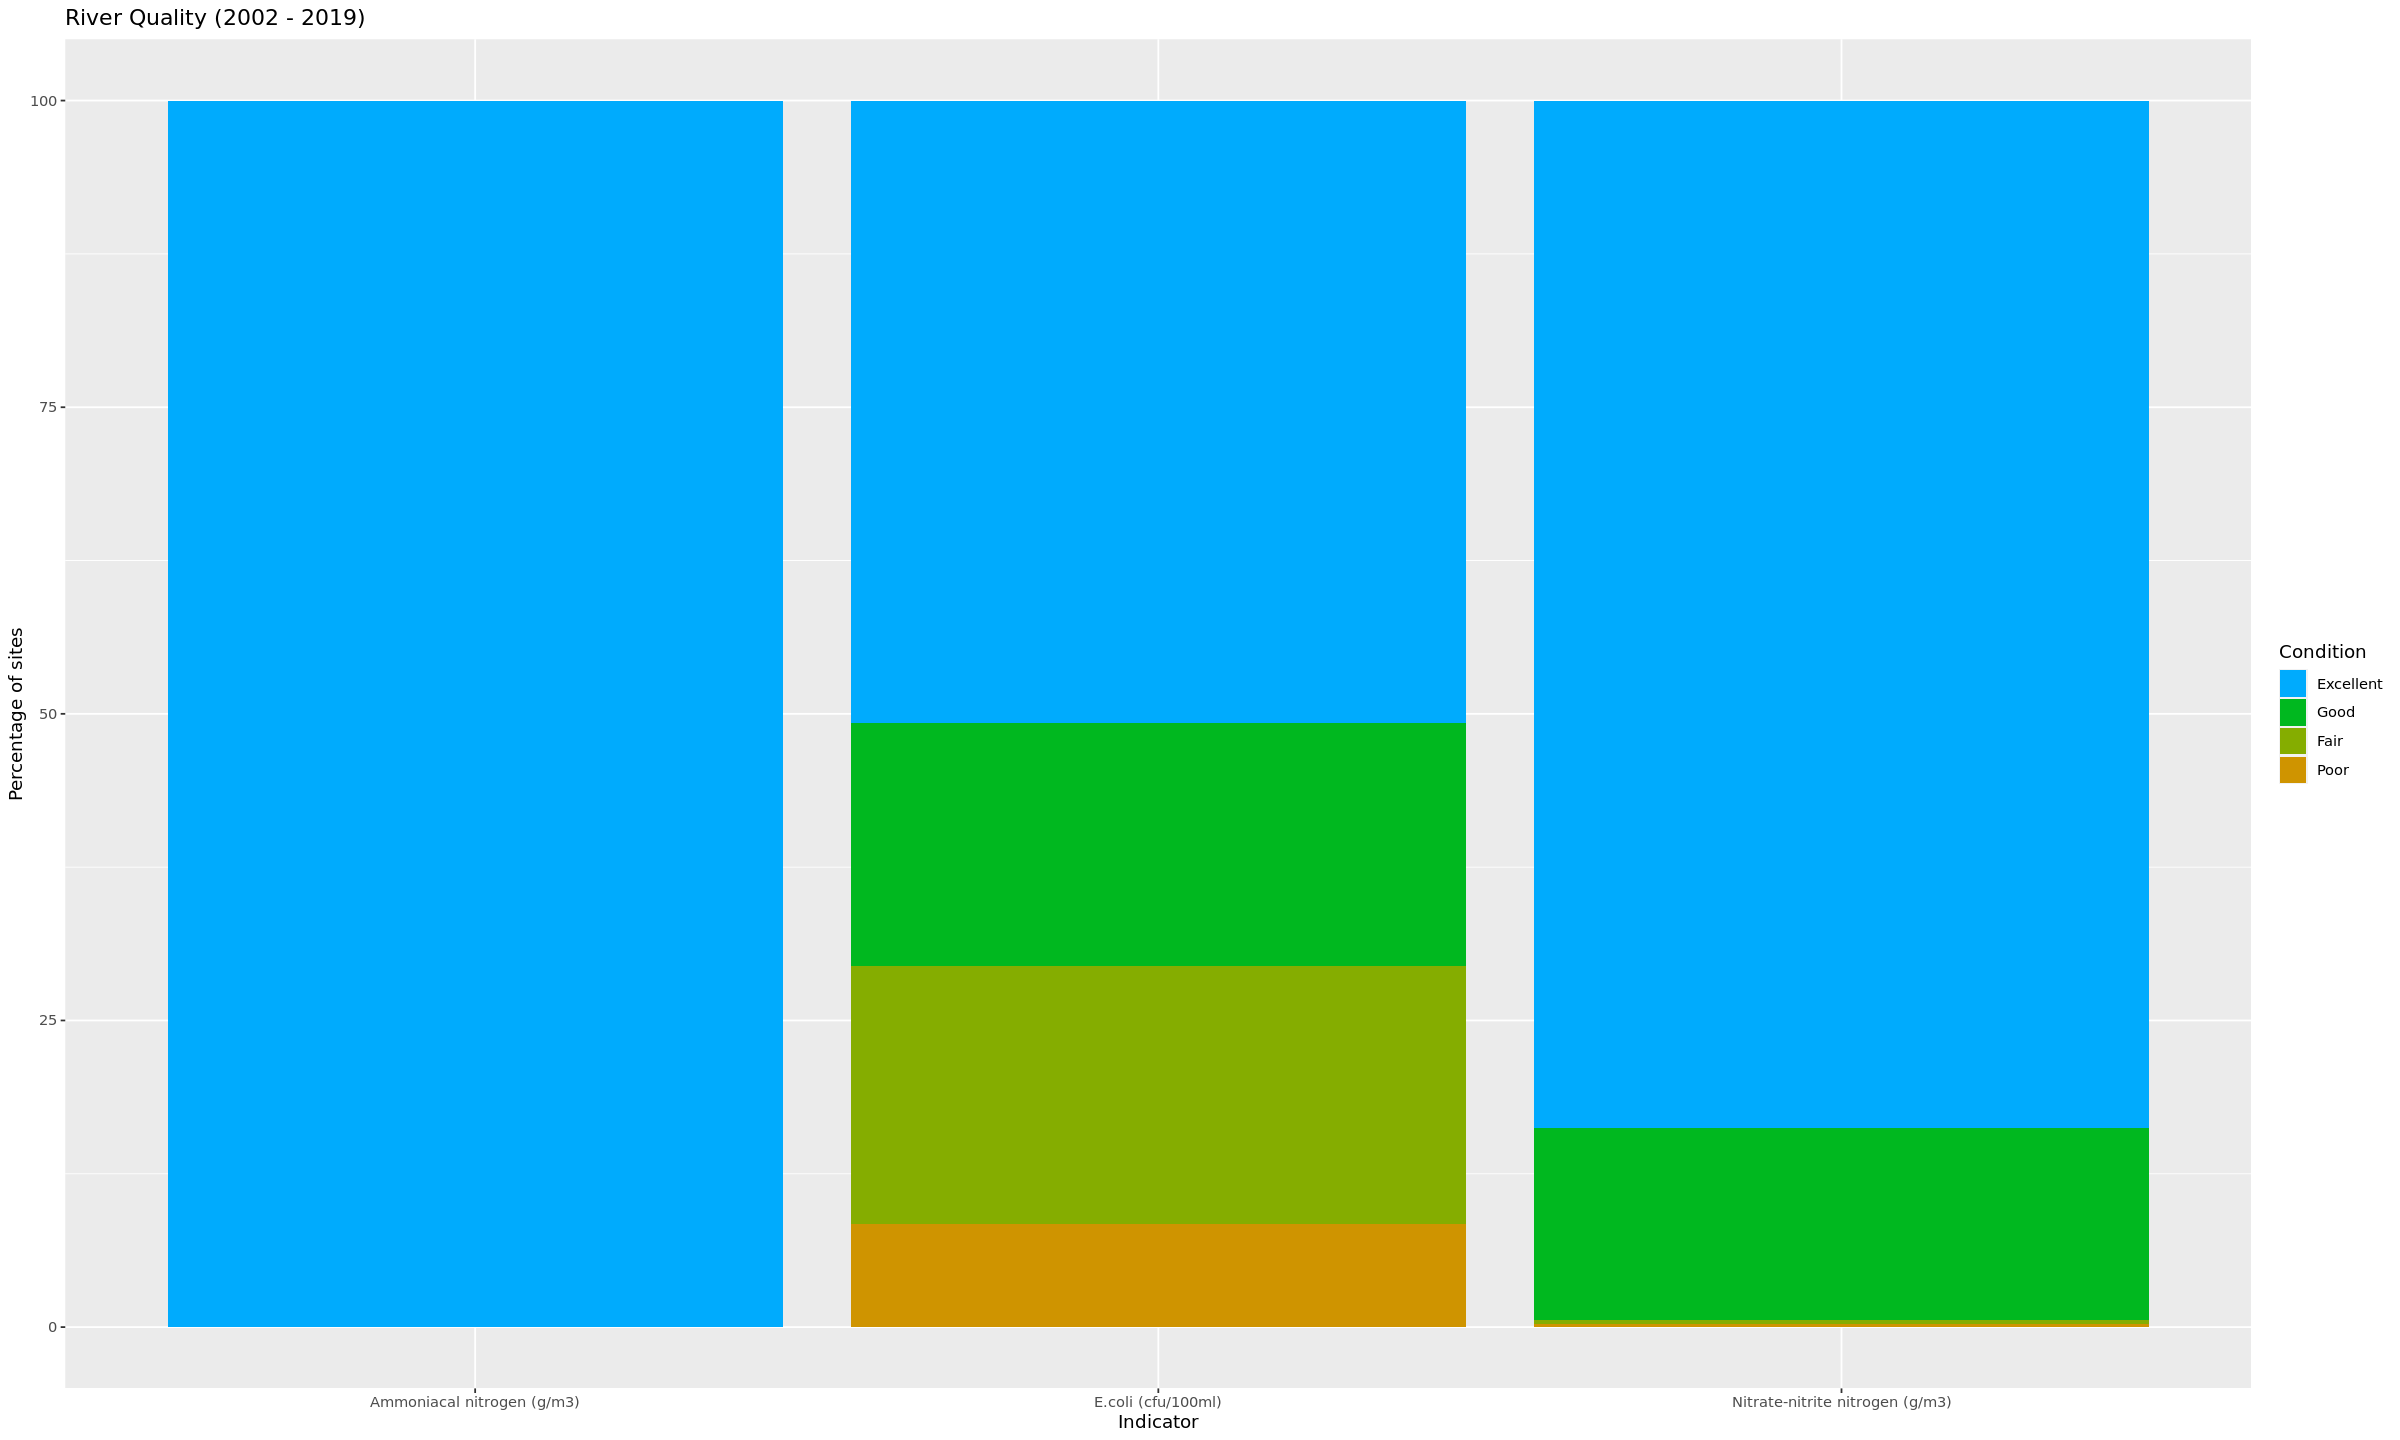

In [72]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites 
# under condition bands, and the indicator (E. coli and nitrogen).
sitepropecoli <- river_quality %>% 
  filter(Indicator == "E.coli cfu/100ml") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m <= 130 ~ "Excellent",
                            m > 130 & m <= 260 ~ "Good",
                            m > 260 & m <= 540 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("E.coli (cfu/100ml)"), 4))

sitepropnitrate <- river_quality %>% 
  filter(Indicator == "Nitrate-nitrite nitrogen g/m3") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 1 ~ "Excellent", 
                            m > 1 & m <= 5.65 ~ "Good",
                            m > 5.65 & m <= 11.3 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("Nitrate-nitrite nitrogen (g/m3)"), 4))

siteammoniacal <- river_quality %>% 
  filter(Indicator == "Ammoniacal nitrogen g/m3") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 1 ~ "Excellent", 
                            m > 1 & m <= 5.65 ~ "Good",
                            m > 5.65 & m <= 11.3 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("Ammoniacal nitrogen (g/m3)"), 1))

# Join all of the resulting data frame to create another data frame that contains all of the information about the proportions
# and counts of river sites under certain condition bands.
sitepropnitrogen <- sitepropnitrate %>% 
  full_join(siteammoniacal)

full_river <- sitepropecoli %>% 
  full_join(sitepropnitrogen)

# Change the order of the categorical variable instead in alphabetical order (condition band).
full_river$Condition <- factor(full_river$Condition, levels = c("Excellent", "Good", "Fair", "Poor"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
river_condition_plot <- full_river %>%
  ggplot(aes(x = Indicator, y = prop*100, fill = Condition)) +
  geom_bar(position = "stack", stat = "identity") +
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                            "#85AD00", "#CF9400")) + 
  ylab("Percentage of sites") +
  ggtitle("River Quality (2002 - 2019)") +
  ylim(0, 100)
river_condition_plot

<p style="text-align: justify"> The idea for the bar plot is the same as the one created for groundwater quality where the plot represents the proportion of sites allocated to different condition bands based on whether their average E. coli counts and nitrogen concentration exceeded certain threshold values. </p>